# PRCP-1003-Customer Transaction Prediction

## Table Of contents

1. Overview
2. Domain Analysis
3. Data Preprocessing
4. Scaling the data

## 1. Overview

This project focuses on predicting customer transactions for a banking dataset, where the objective is to identify whether a customer will make a transaction in the future. The dataset consists of 200 anonymized features, along with ID_code and a binary target column indicating transaction behavior. Since the dataset is anonymized, exploratory data analysis (EDA) is limited, and the focus is primarily on feature preprocessing, model building, and evaluation. Various machine learning models are applied, and their performances are compared to identify the most suitable model for production use. The project also documents the challenges faced during data handling, preprocessing, and modeling, along with the techniques used to overcome them. The outcome provides valuable insights for the banking sector to proactively identify potential customers likely to engage in transactions, thereby supporting better decision-making and customer engagement strategies.

## 2. Domain Analysis

- ID_code: A unique identifier for each customer.
- Target: Binary variable (0 = no transaction, 1 = transaction).
- 200 anonymized features (var_0, var_1, … var_199): These represent customer-related attributes such as demographics, behavioral, or financial patterns, but their actual meaning is not disclosed due to anonymization.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('train(1).csv')

In [ ]:
df.shape

(200000, 202)

In [ ]:
pd.options.display.max_columns = None

In [ ]:
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [ ]:
df.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,-0.6209,5.6669,3.7574,-9.5348,13.9860,5.2982,8.2705,14.1527,7.4540,-5.0105,12.0465,8.6349,9.9137,25.1376,1.0914,3.2326,7.7802,13.9939,2.9085,0.1005,4.2369,7.5665,-9.2149,9.5746,1.4012,7.4211,11.0075,7.8080,4.5567,4.9861,9.7471,0.0722,5.9053,8.1743,10.8800,11.1665,4.2600,-2.1296,8.7833,-15.5727,-8.4916,22.1905,12.4110,15.1168,1.6041,6.1868,10.9576,18.7371,15.2986,5.7322,5.1244,9.8225,14.0315,-23.6064,-1.3403,-2.5577,6.3582,-5.4557,5.6063,7.0054,5.0171,-5.0055,28.9502,1.2297,4.4918,19.5568,20.8357,19.2136,17.6422,17.9836,4.0395,14.0761,-5.7878,16.3870,-14.1721,-13.0269,-2.5955,21.4526,15.6163,0.9845,8.2110,-0.8553,-12.1682,6.7779,7.3895,10.5084,15.5057,-0.6812,5.8999,6.1825,3.1038,-1.6930,-18.8473,9.9358,25.3359,1.3647,11.8509,5.0357,6.4630,18.4008,14.3787,19.0369,-0.6364,6.9155,3.6763,3.1460,4.9442,-1.8289,1.3521,34.6265,-0.6869,-5.3781,20.5030,10.9614,4.9677,6.1408,2.2575,12.8757,14.2253,-1.2868,0.2212,16.8661,12.7663,1.2414,7.1304,7.4108,-6.3369,3.0760,24.9796,20.3410,5.3312,23.7116,2.4745,11.2013,17.8165,13.0057,9.5506,5.3589,13.2491,-3.3068,3.6998,2.5927,14.3025,8.1596,7.9609,18.3343,4.3086,1.3546,12.4158,-5.3985,16.3683,10.4522,35.4923,5.5477,7.4244,12.5459,-6.7840,31.1895,2.6529,-11.1867,9.8865,5.4730,-5.3880,-0.4698,24.4025,-5.4493,11.3529,7.7075,-5.0491,13.0756,15.8271,3.3580,-14.3371,10.4421,7.6530,9.4585,22.7783,-4.0305,4.2233,-6.3906,13.5058,-0.4594,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,-3.6797,6.0019,6.5576,-11.8776,14.4131,3.3087,3.5800,14.1597,7.5191,-8.8715,17.9467,17.0237,6.6459,18.2345,0.8982,2.2532,15.4977,13.3282,5.2281,-3.7424,5.5144,5.7148,-13.7470,7.4369,1.3041,12.7552,12.5362,-1.1002,2.4370,6.2631,14.8565,-2.9862,-7.8820,7.1320,11.8869,11.4218,8.9282,-27.2007,14.5962,-19.8502,26.0775,24.3915,12.6910,10.2453,6.8173,4.5666,-9.5685,18.4685,16.9534,7.3660,4.7038,9.4559,6.0037,-10.8728,0.7859,4.7000,7.8077,-1.7926,6.1534,12.9087,5.0398,-0.4247,22.6256,0.7166,0.6533,13.5821,20.3267,25.5380,14.0155,17.3326,4.2046,14.0195,11.4812,17.9954,-18.3549,-3.4537,1.1233,22.3135,1.9795,16.0239,4.7492,0.2446,-39.6406,6.9473,9.9392,11.1977,14.1006,-0.8012,18.8214,32.9827,1.7989,-0.2476,-15.5294,9.5501,11.8548,1.5127,11.3998,4.2304,6.6777,11.3434,14.2993,13.1205,13.3224,7.3143,3.6817,9.7780,4.0491,2.7221,4.4344,3.7648,2.1927,-2.9197,23.0679,12.2112,

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [ ]:
df.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

## Check duplicates and null values

In [ ]:
dup = df.duplicated().sum()
print('There are', dup, 'duplicates')

There are 0 duplicates


In [ ]:
check_null = df.isnull().sum().sum()
print('There are',check_null,'Null values')

There are 0 Null values


## Check Target Imbalance

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df.target.value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

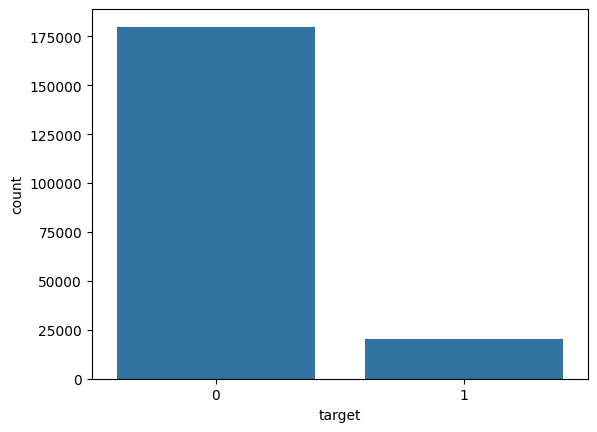

In [ ]:
sns.countplot(x='target', data=df)
plt.show()

The target variable is highly imbalanced, with 179,902 instances in class 0 and 20,098 instances in class 1. This imbalance may require resampling techniques or class-weight adjustments during model building.

## Data Preprocessing

### Check distribution

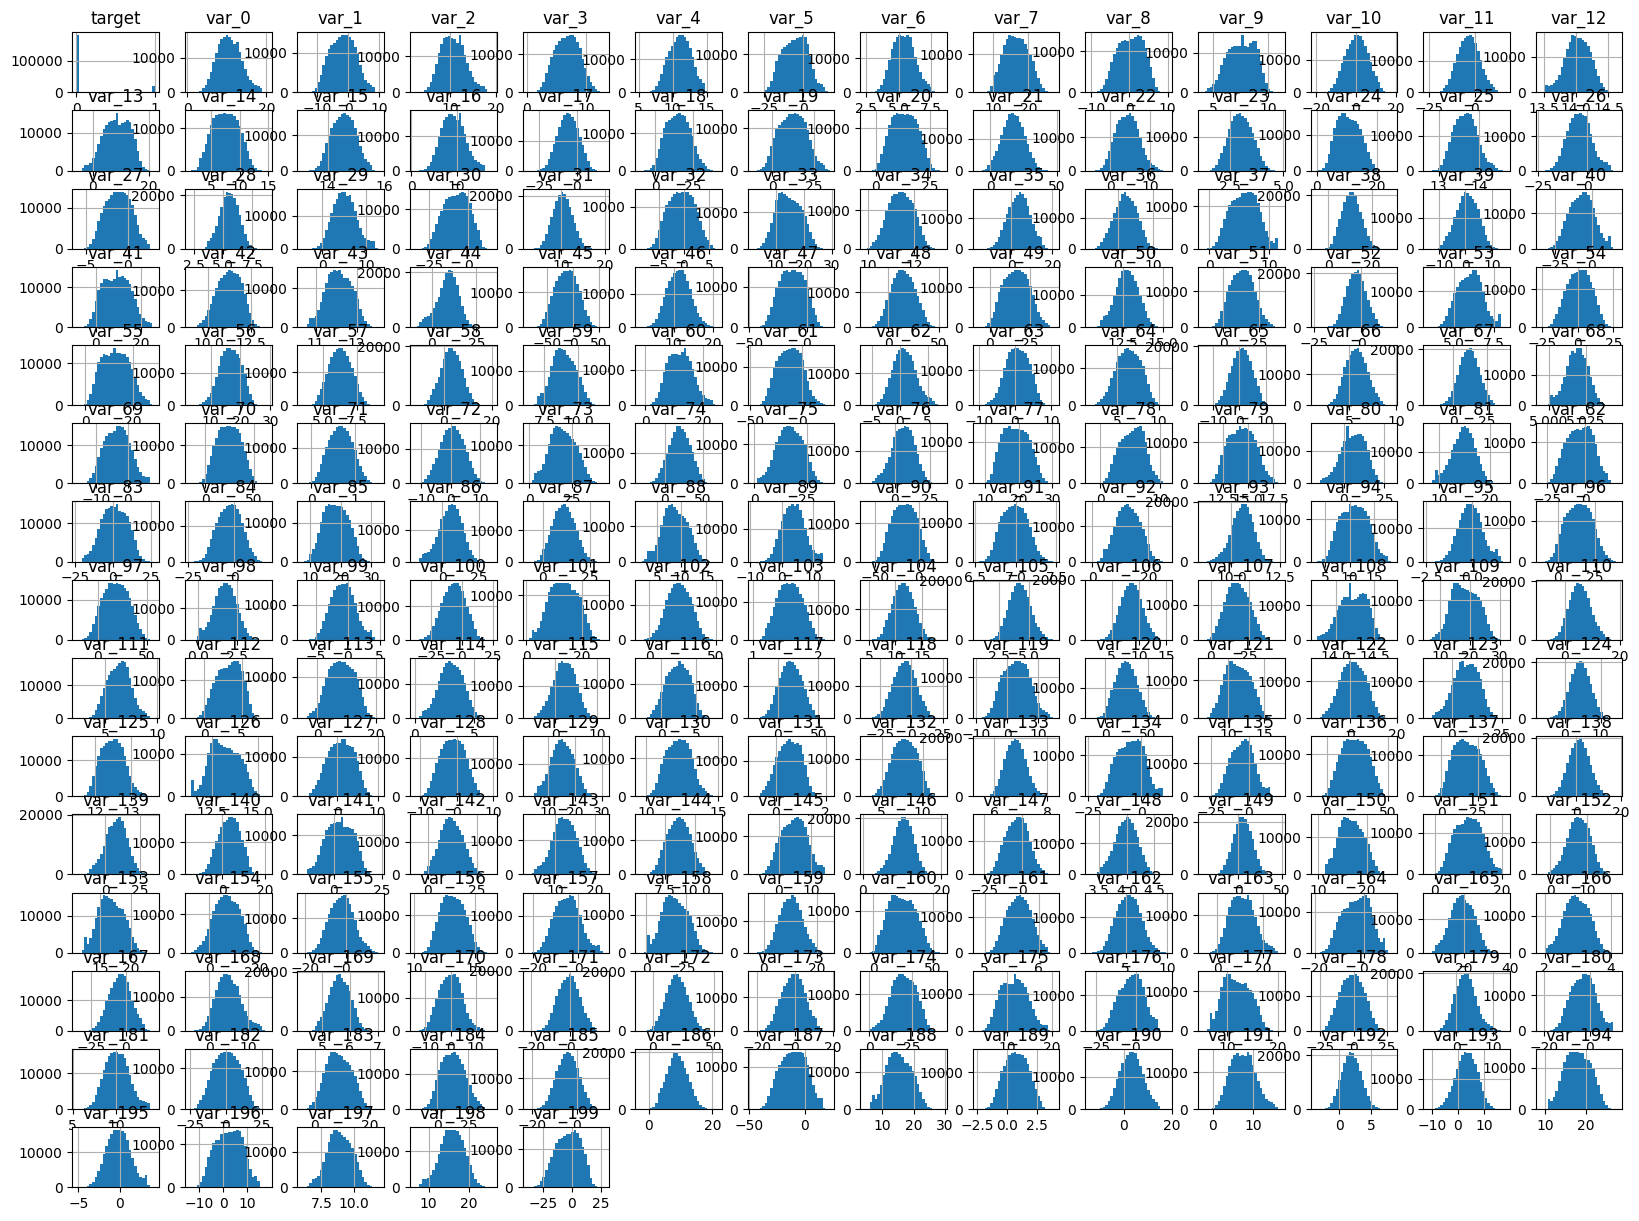

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(20, 15))
plt.show()
plt.savefig("histograms.png", dpi=300, bbox_inches='tight')

### Check the outliners

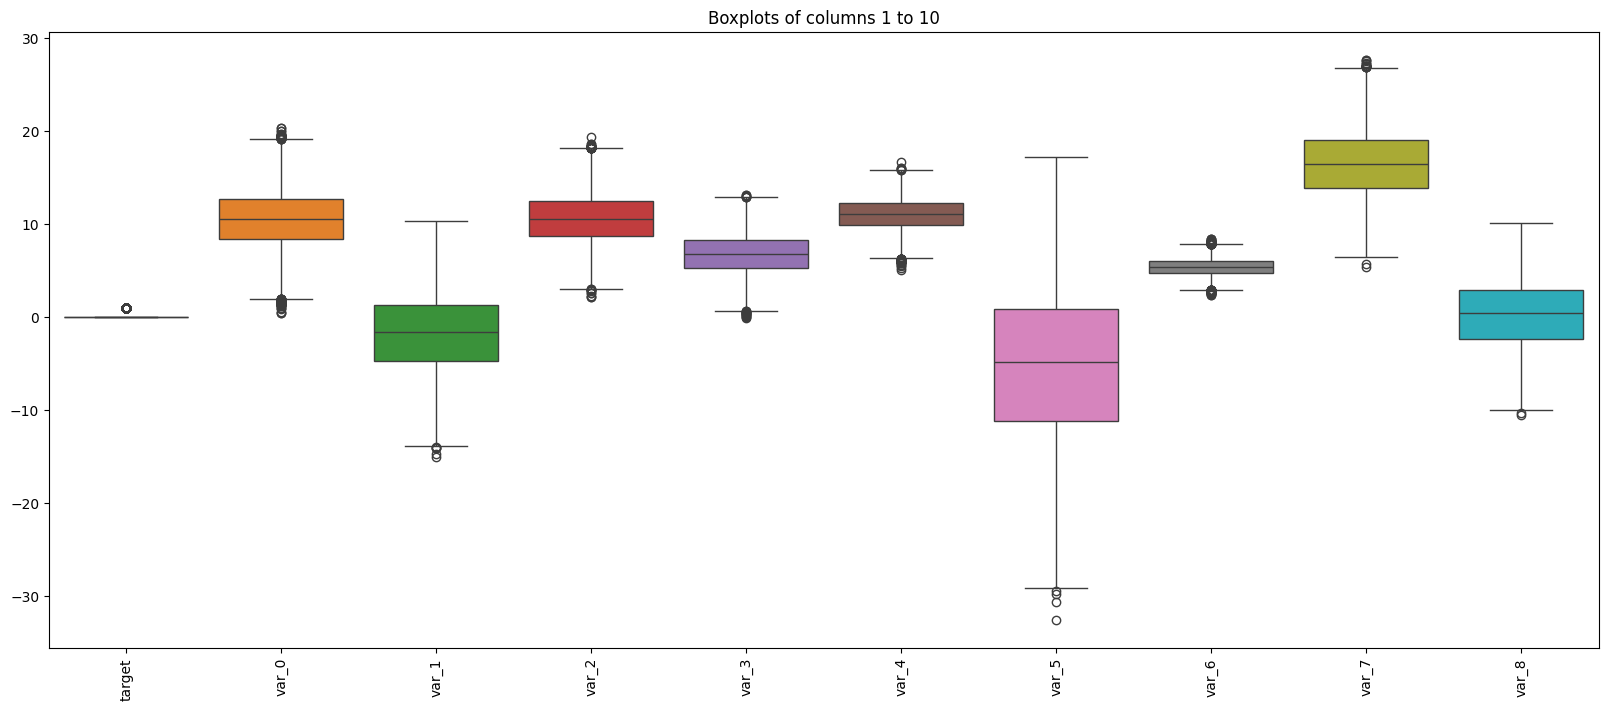

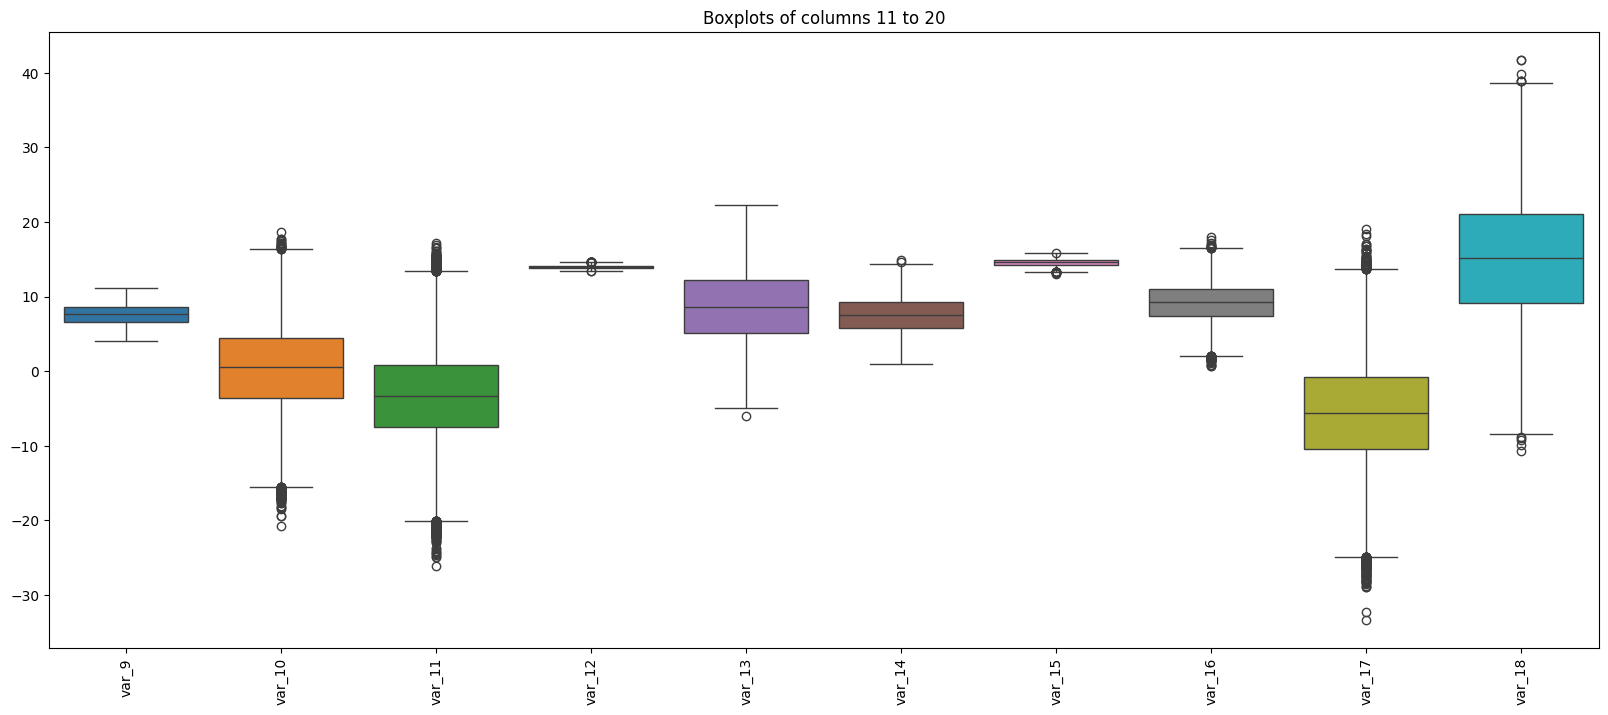

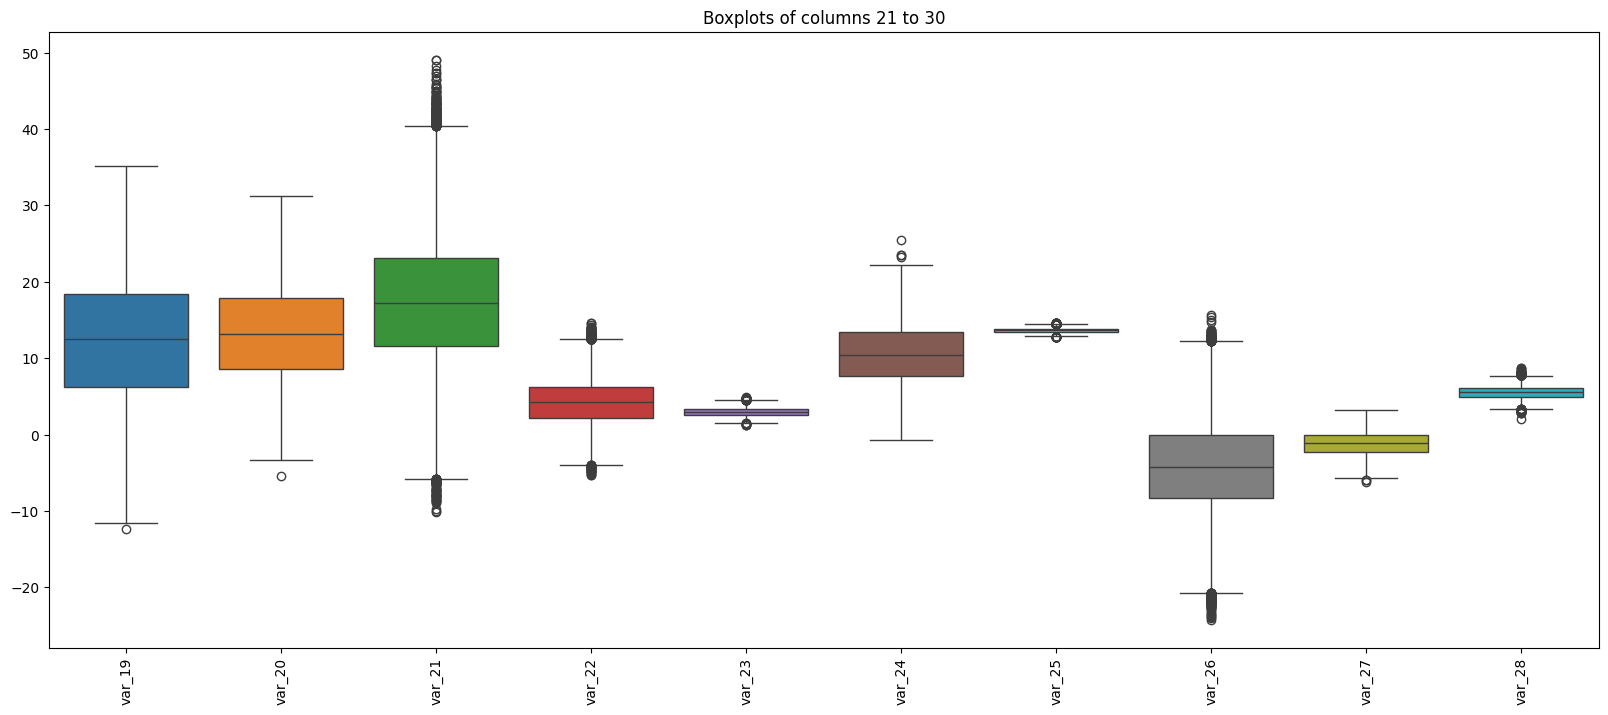

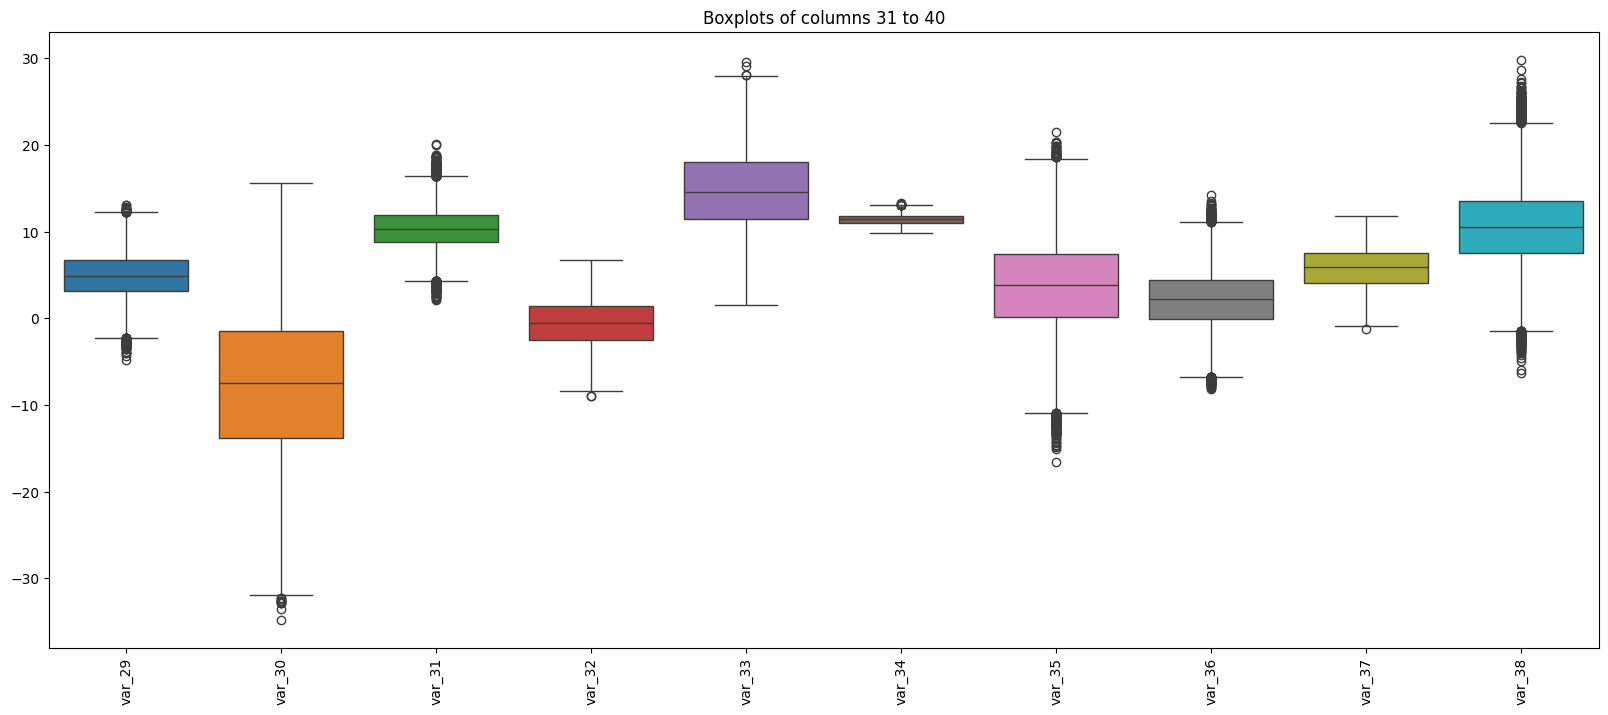

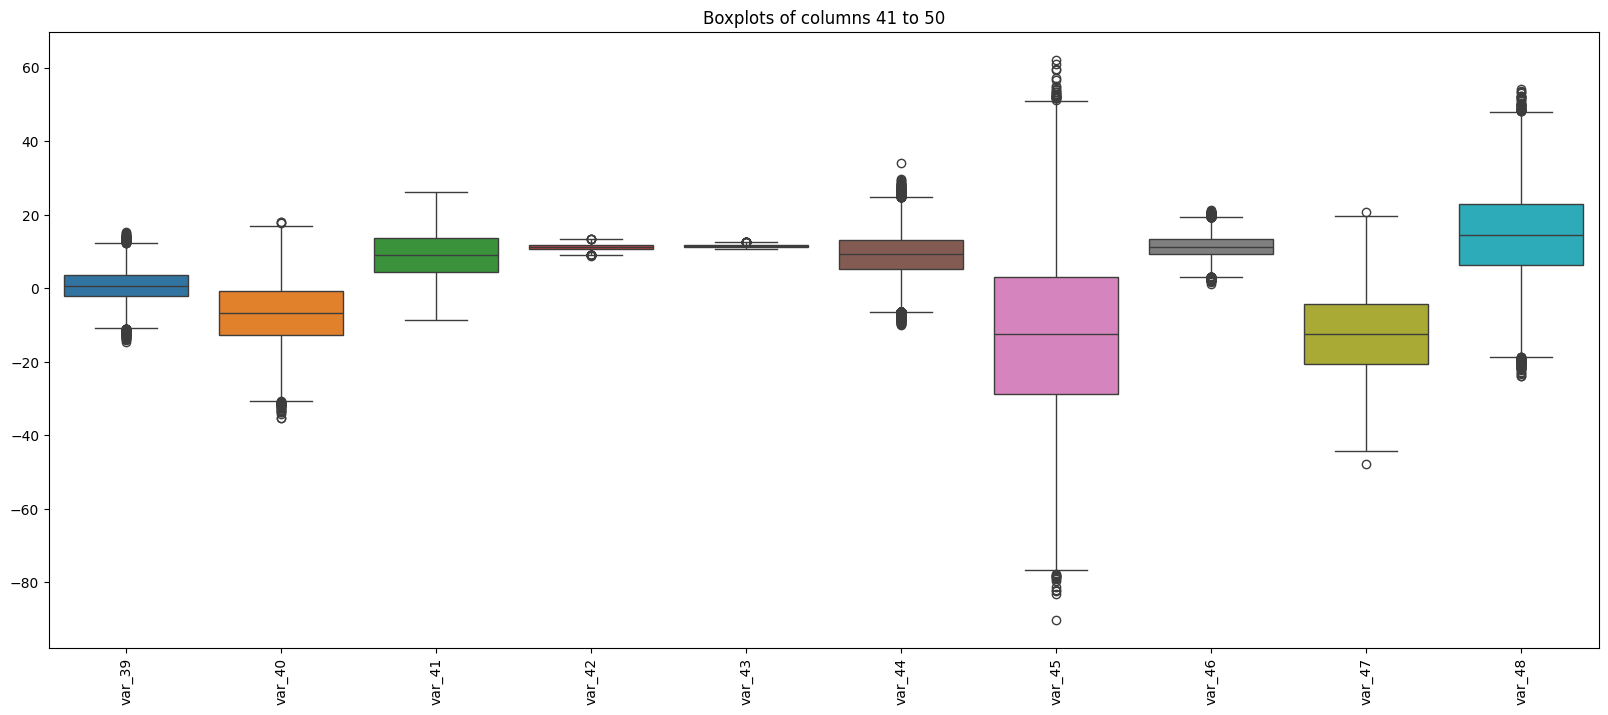

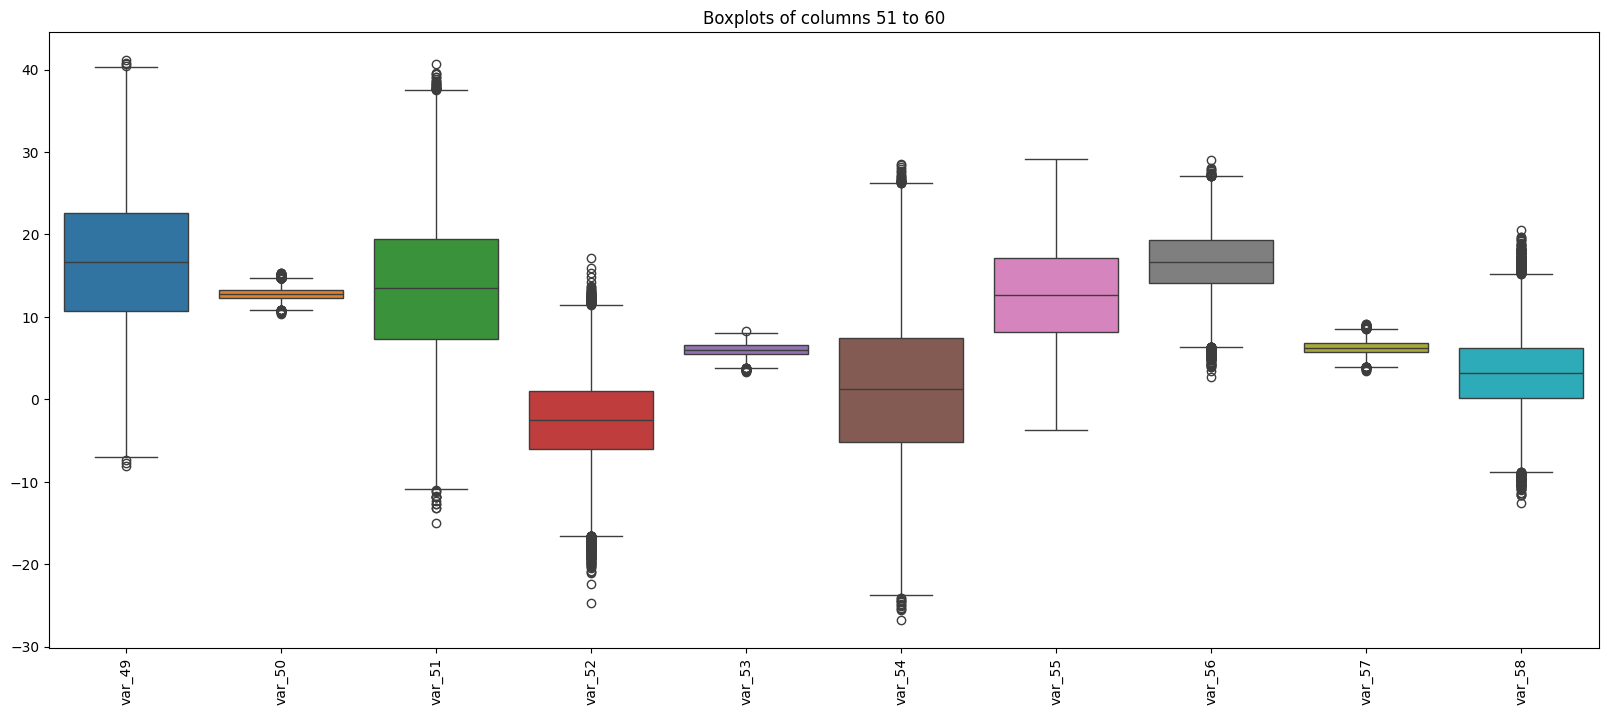

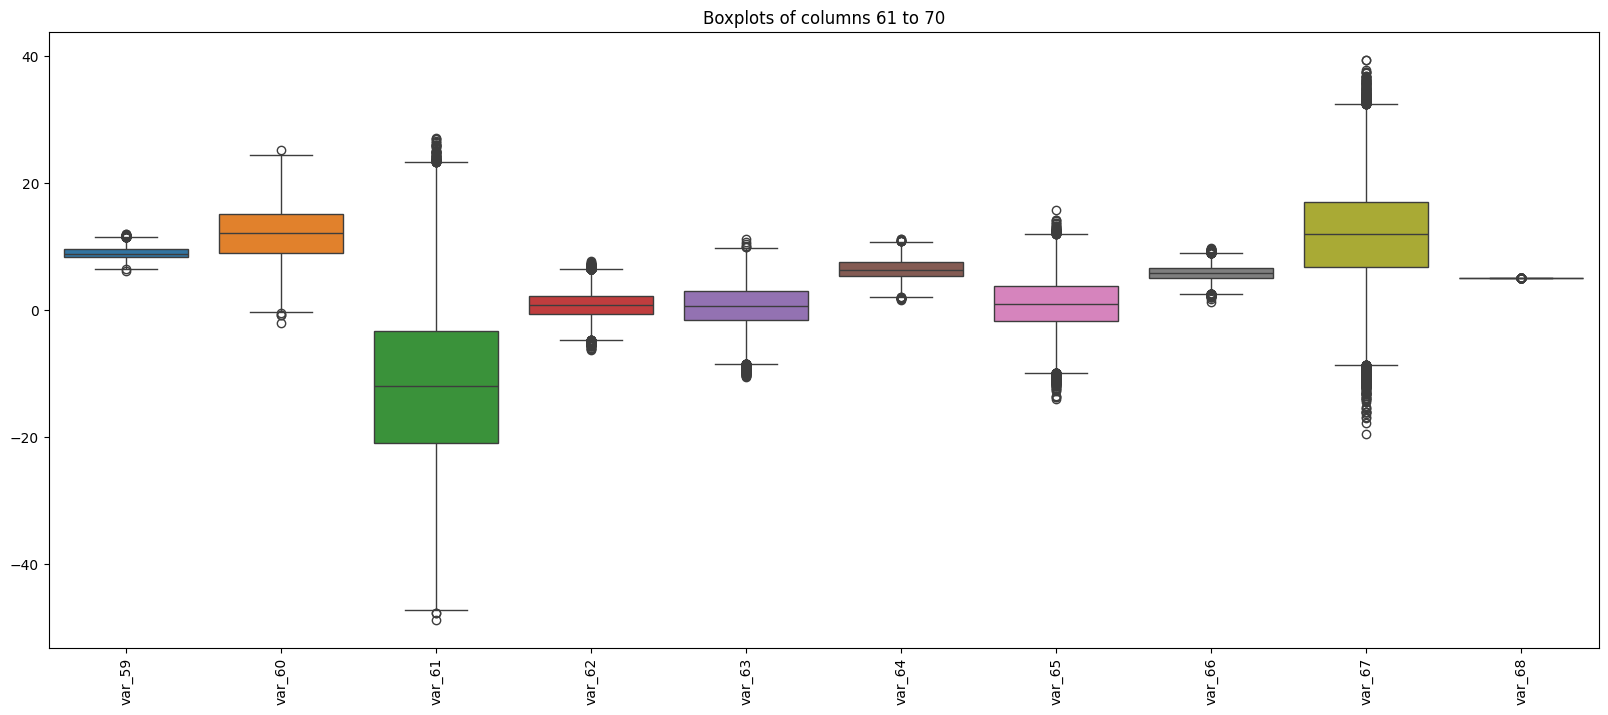

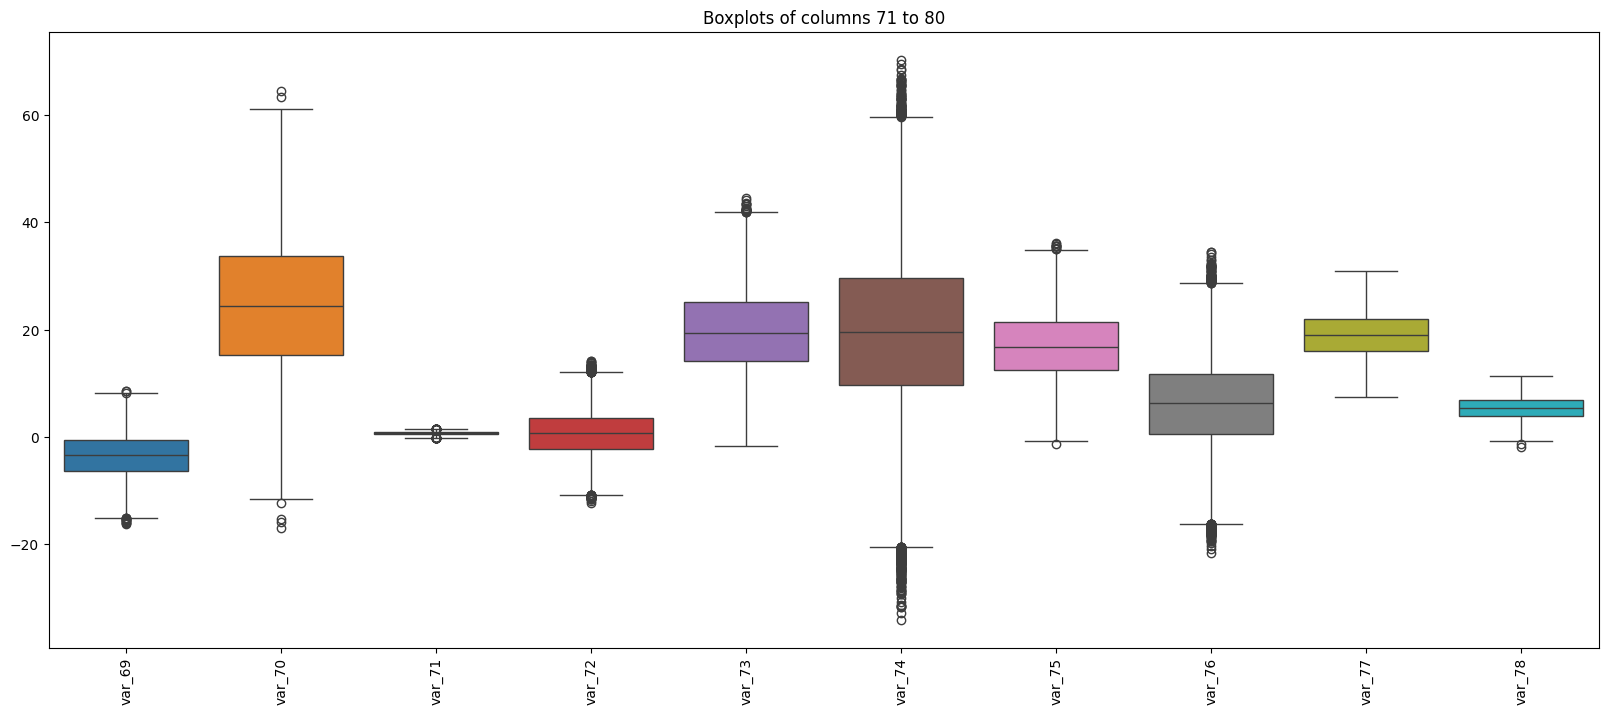

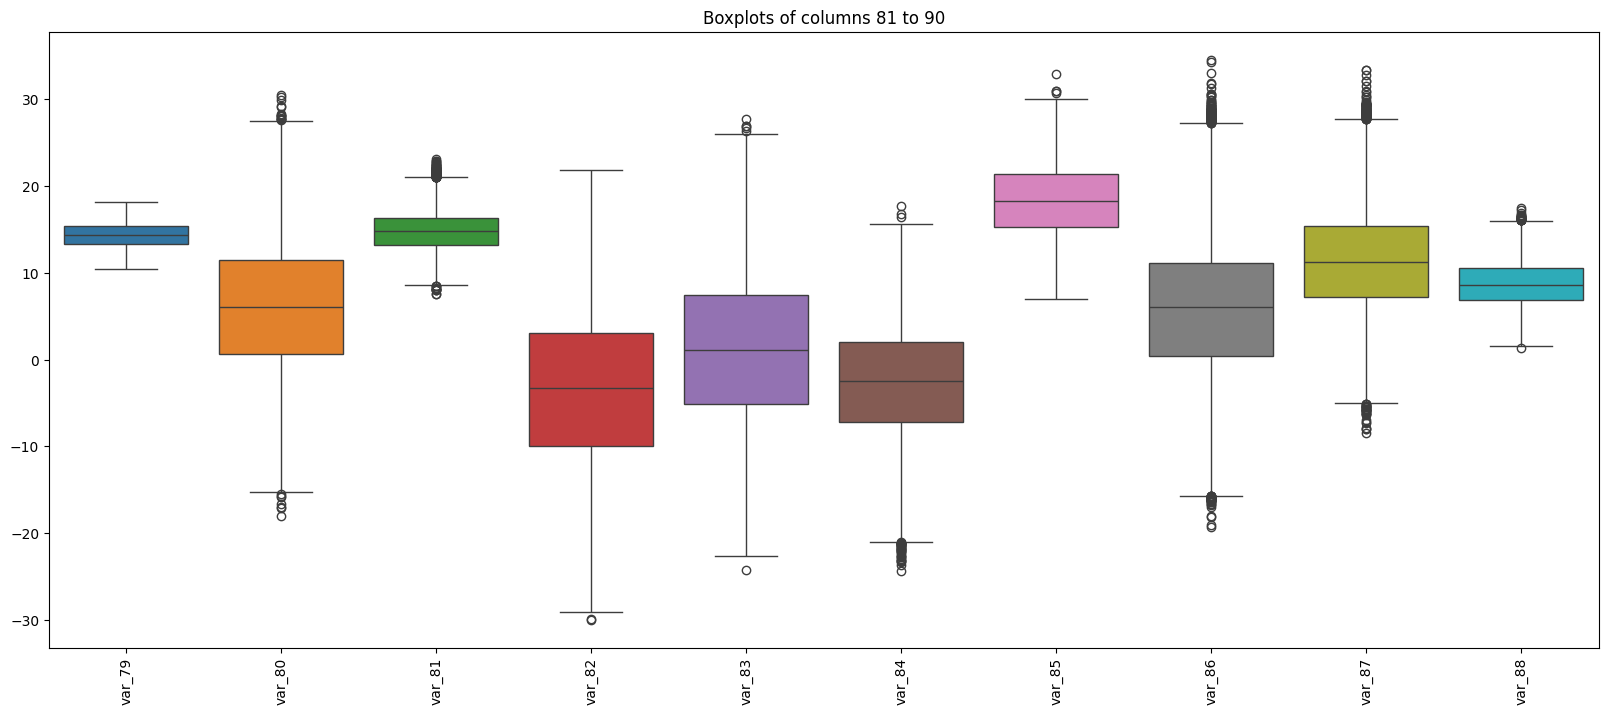

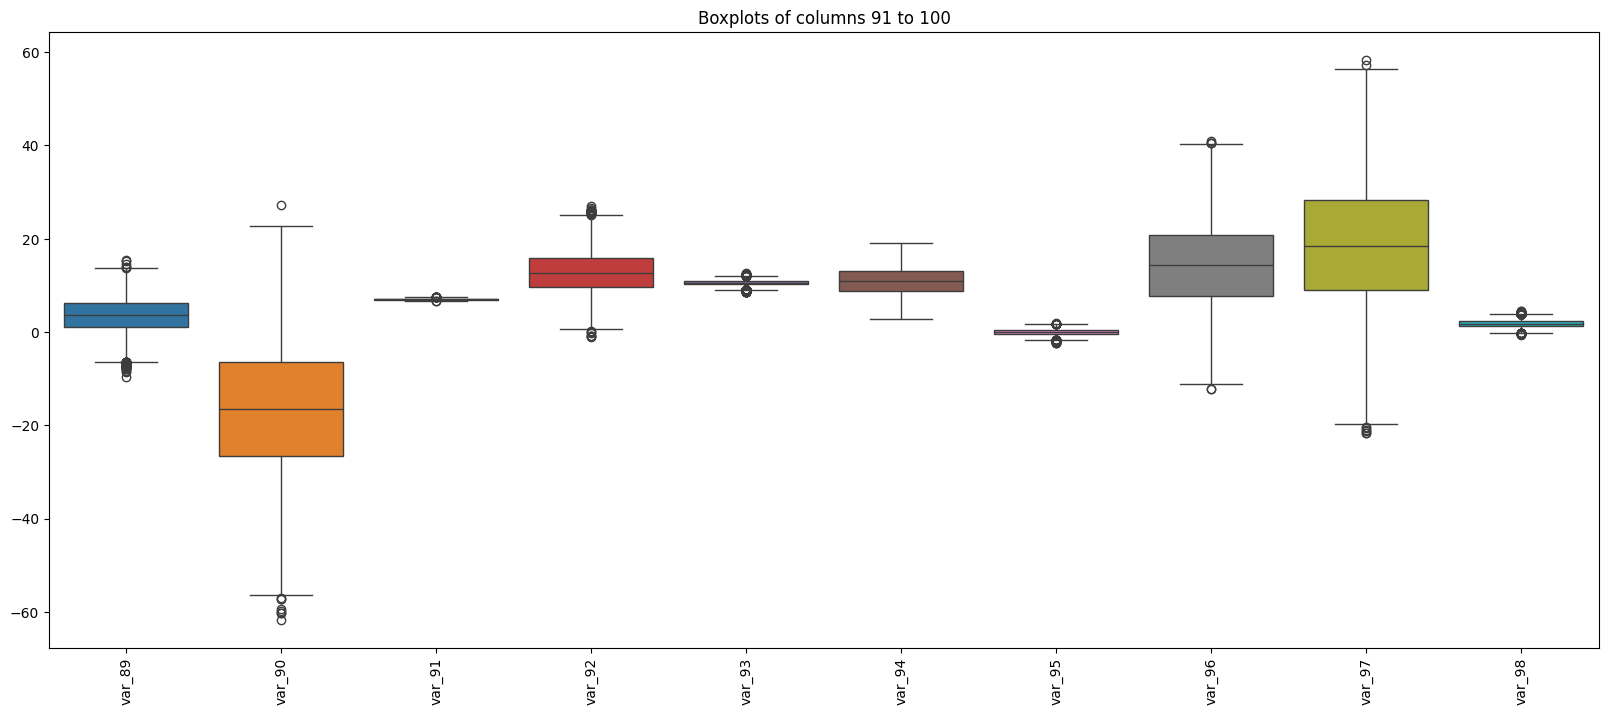

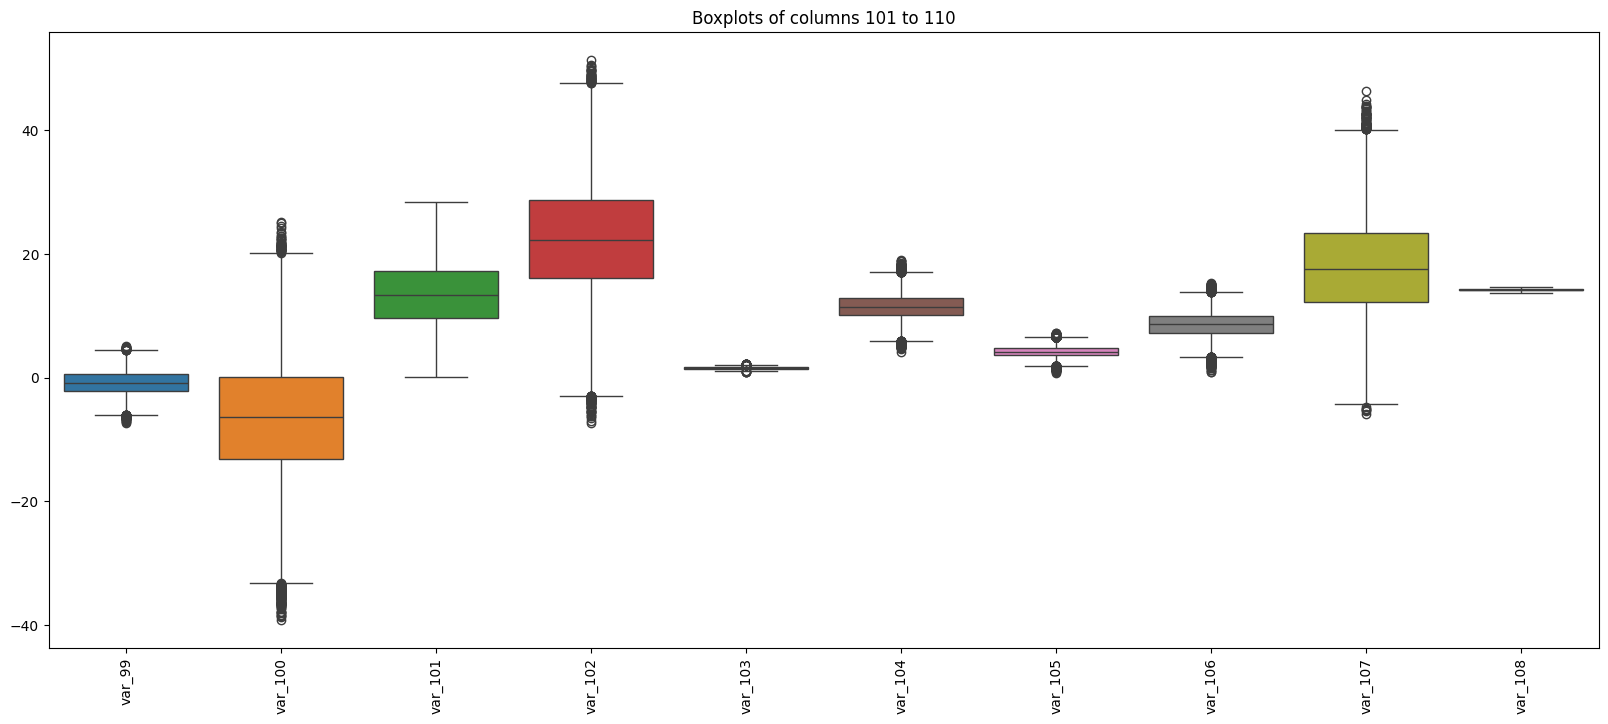

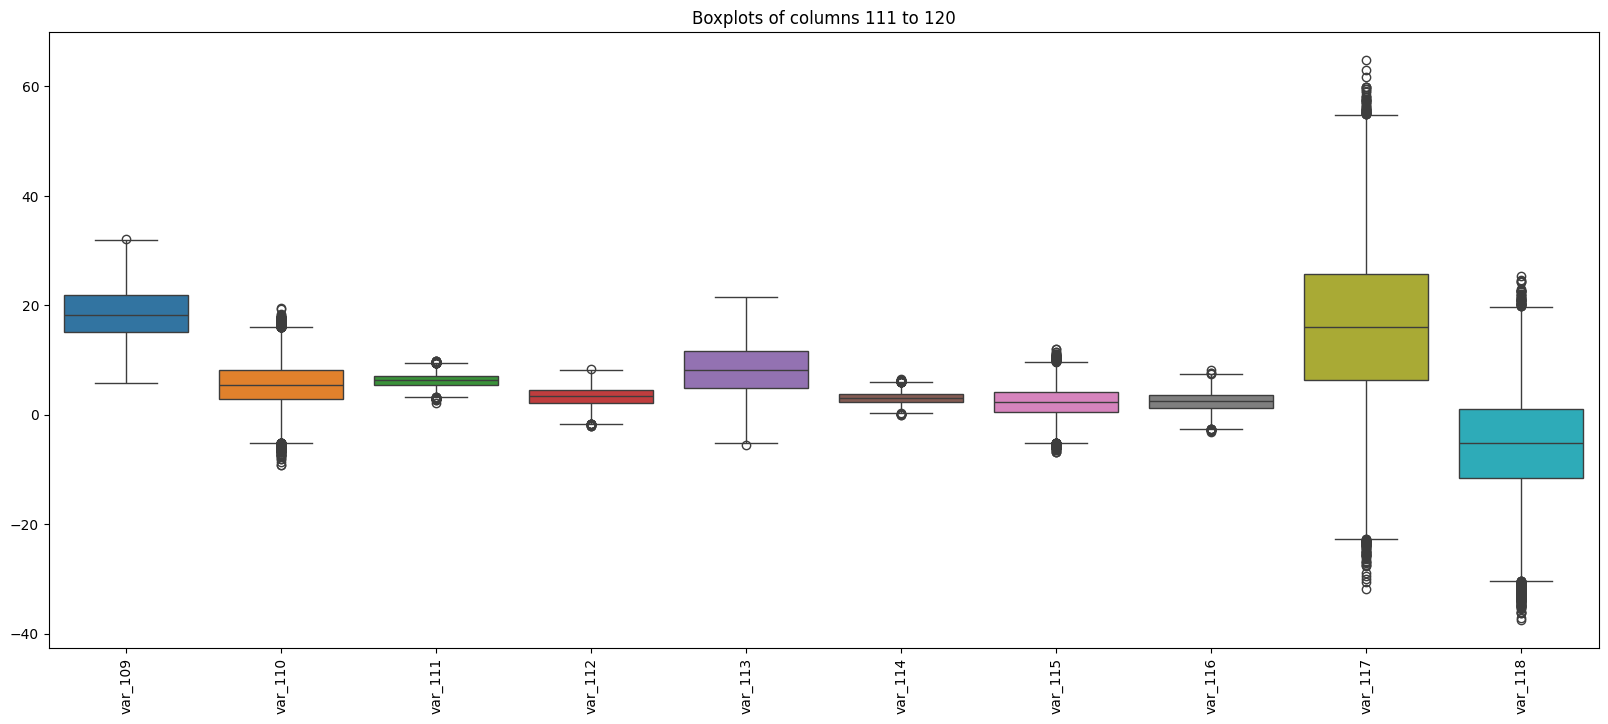

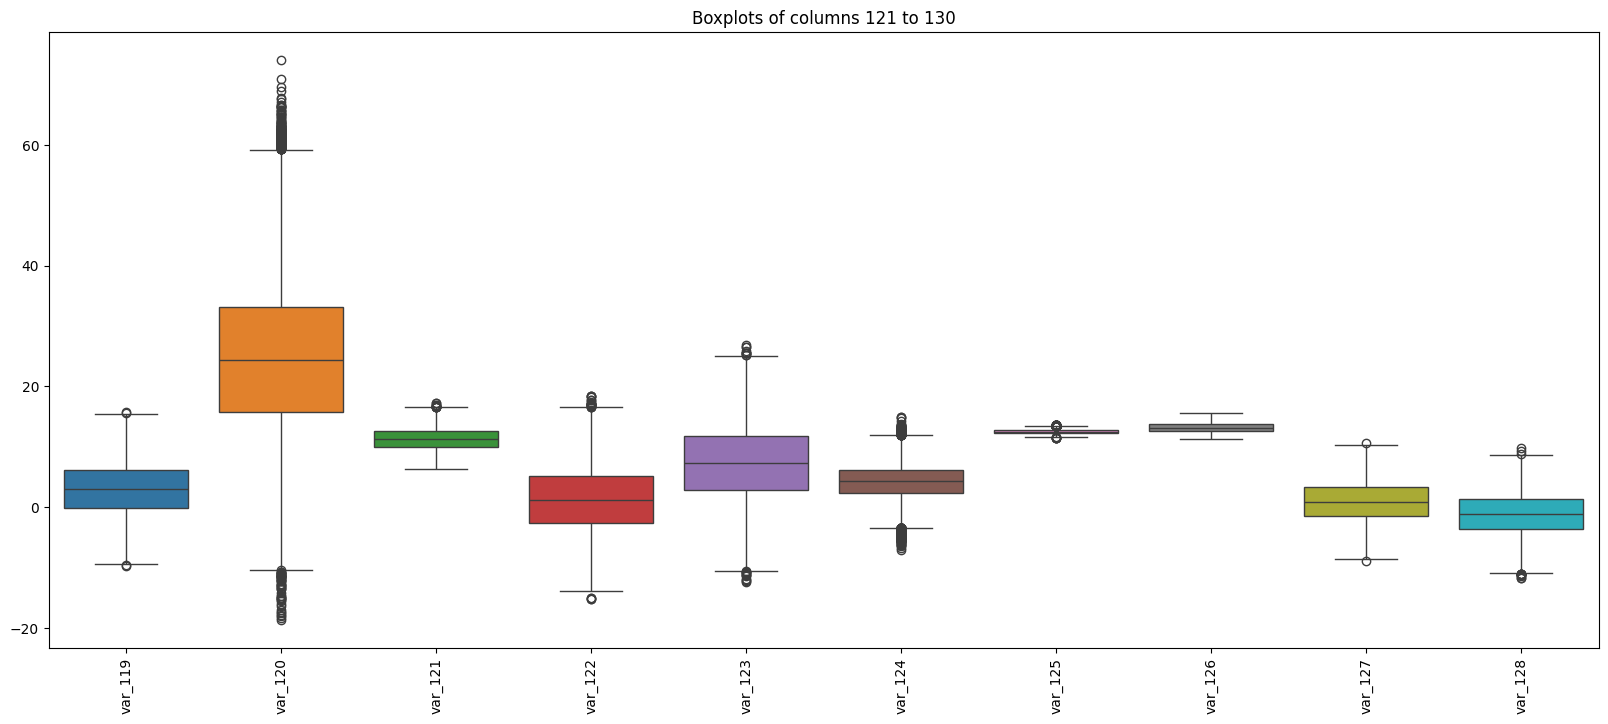

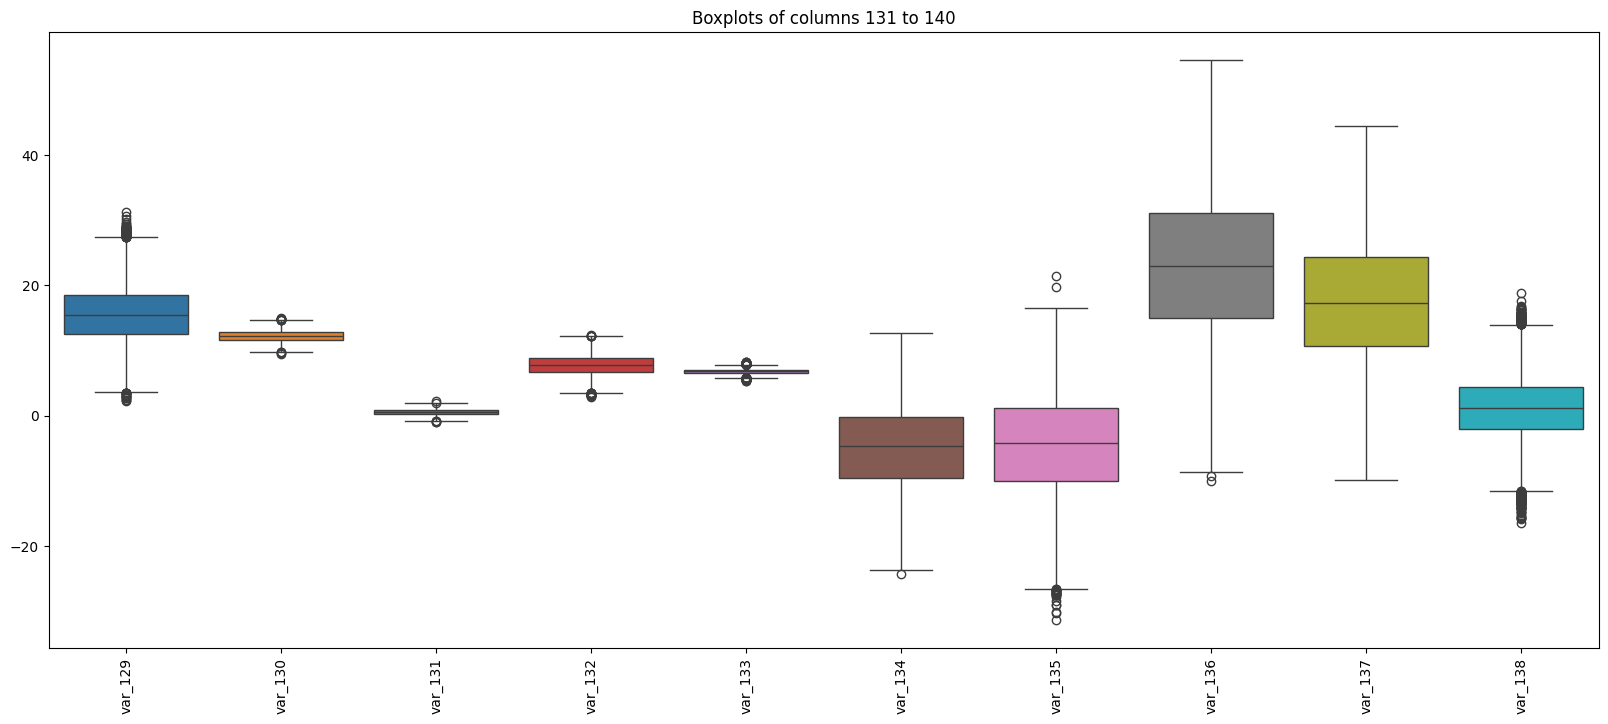

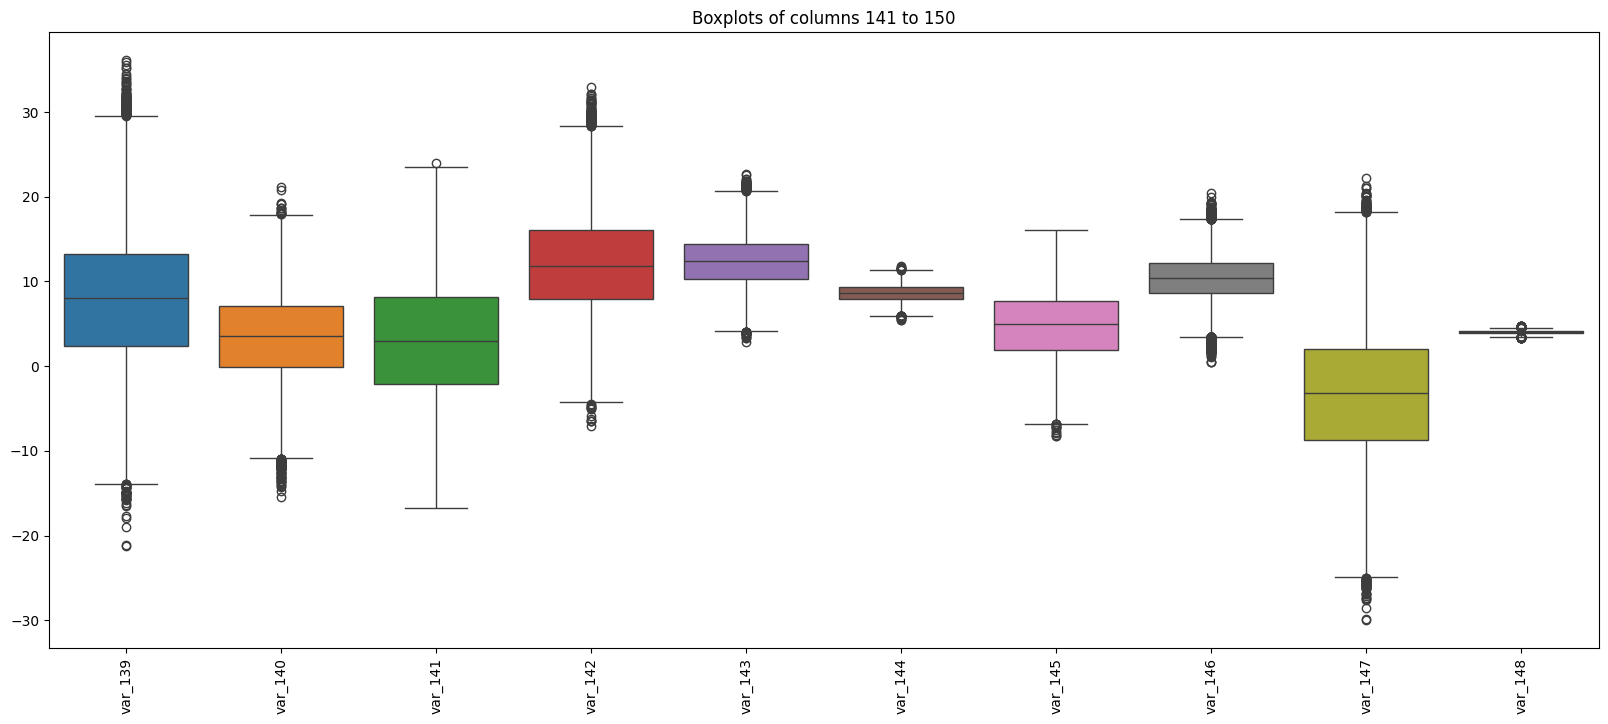

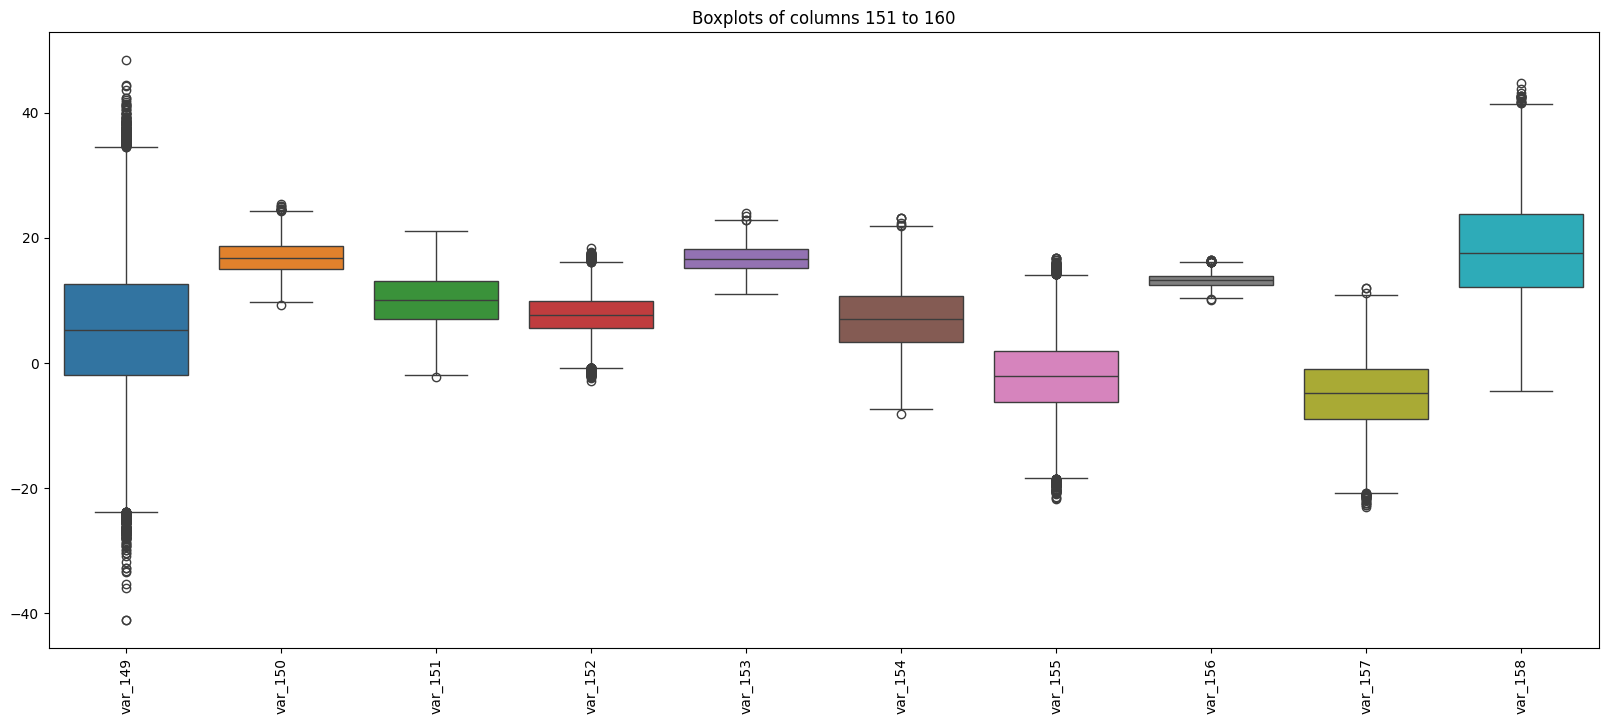

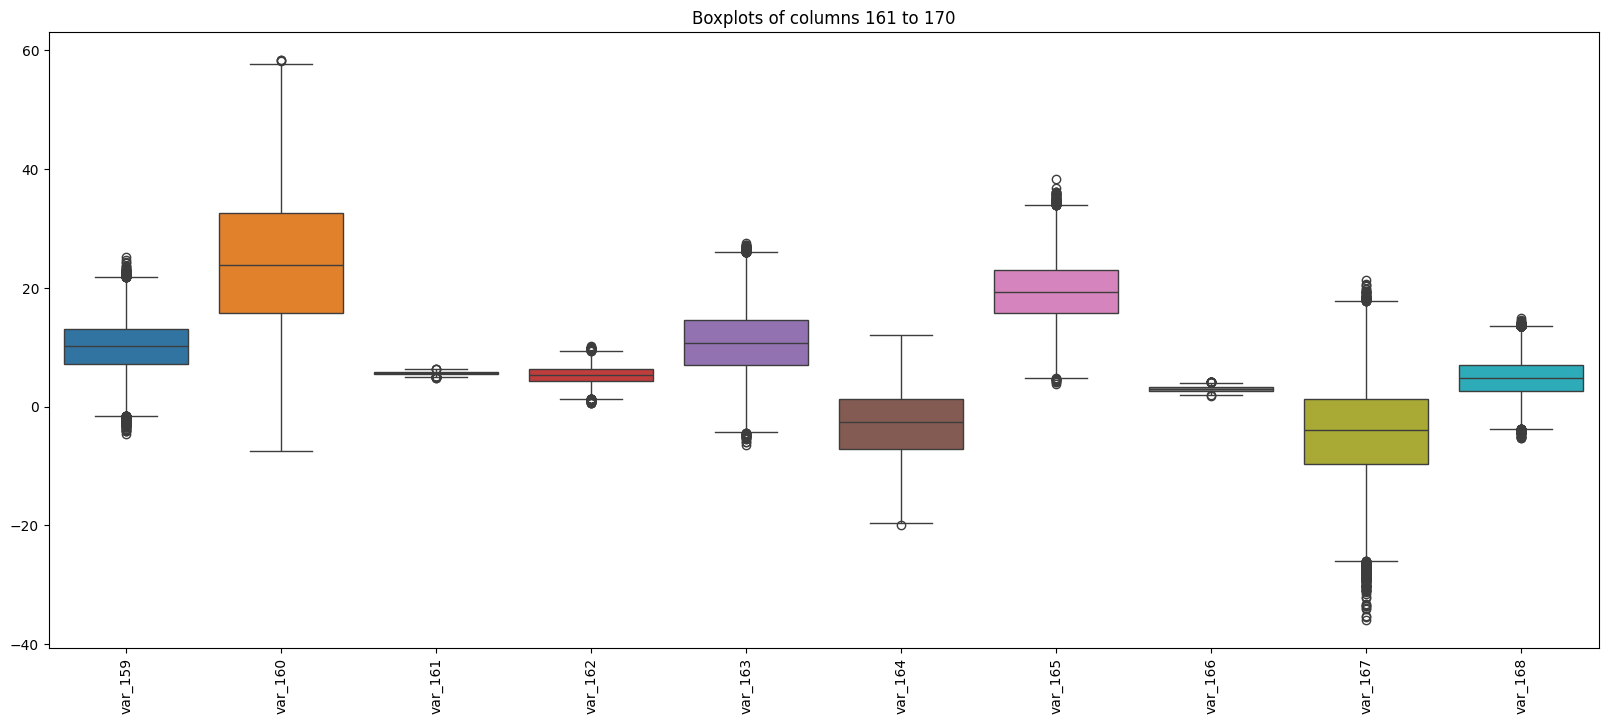

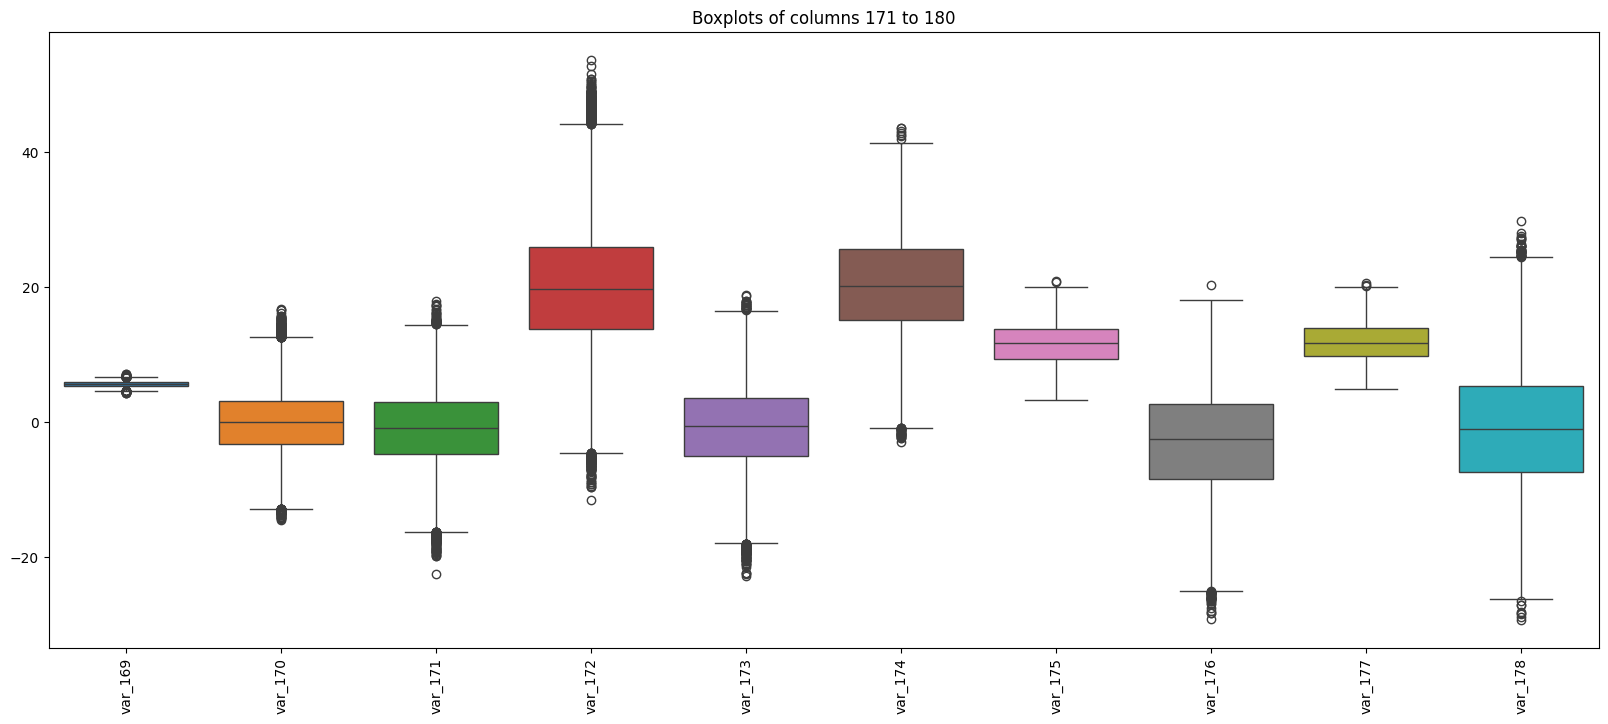

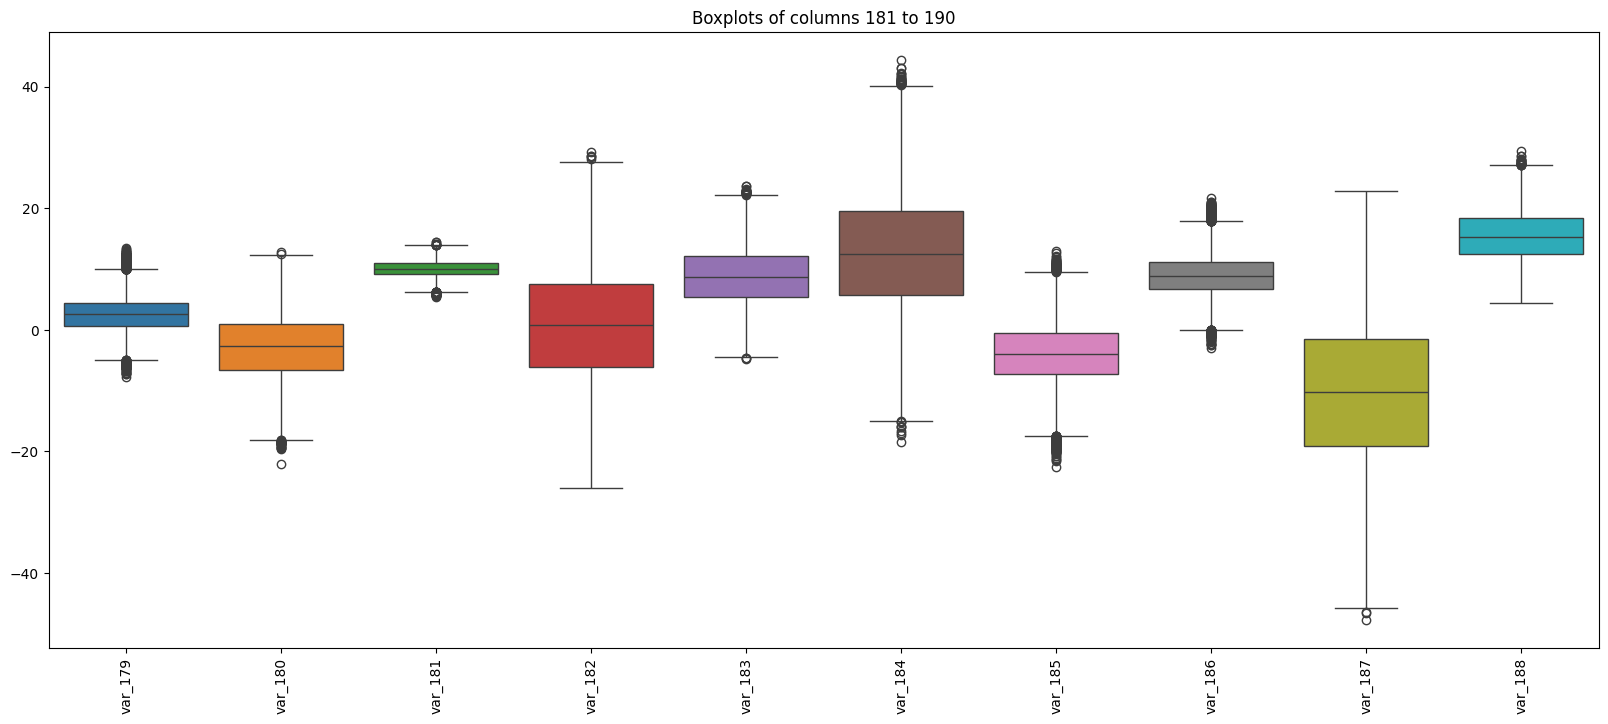

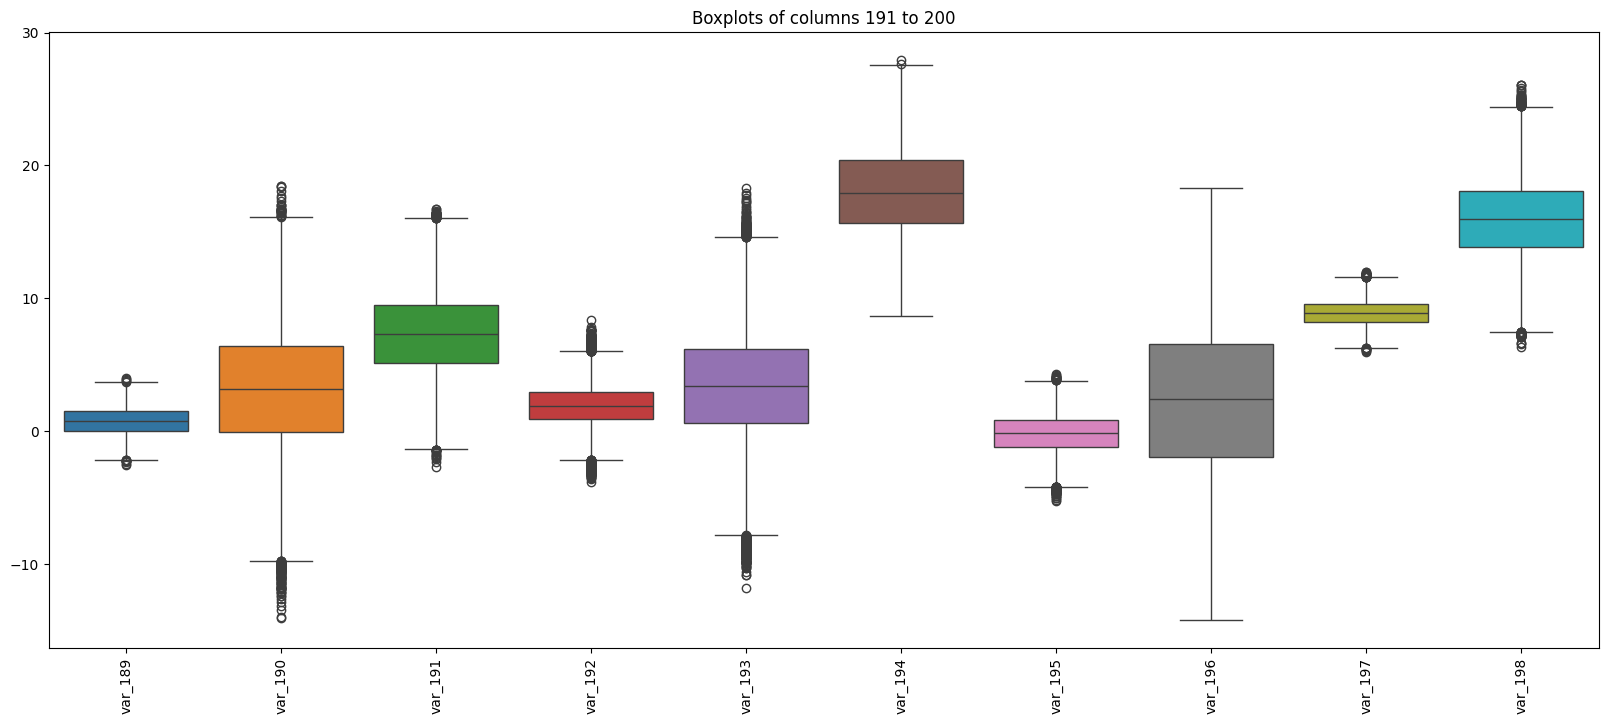

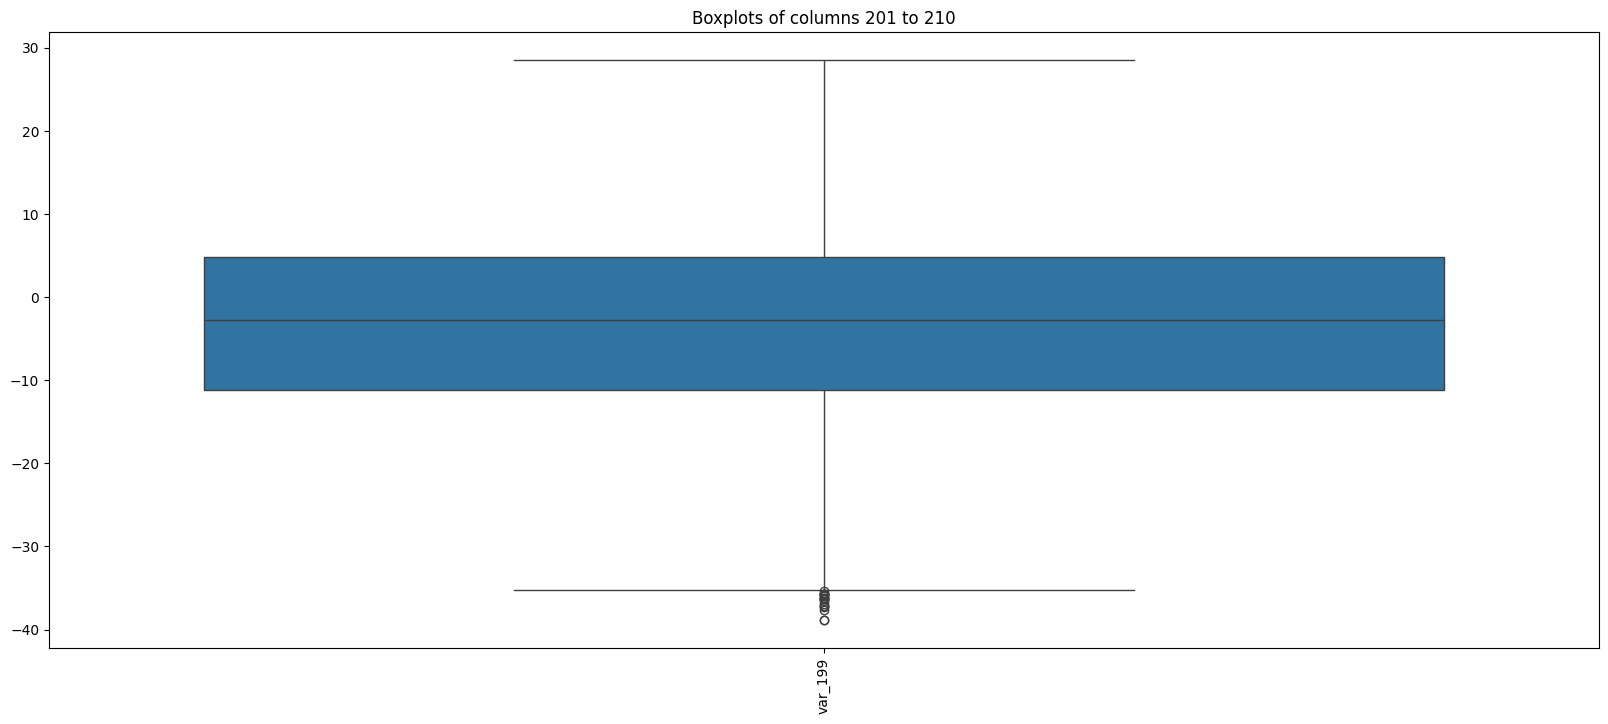

In [ ]:
import numpy as np

num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot 10 boxplots at a time
for i in range(0, len(num_cols), 10):
    plt.figure(figsize=(20, 8))
    sns.boxplot(data=df[num_cols[i:i+10]])
    plt.xticks(rotation=90)
    plt.title(f"Boxplots of columns {i+1} to {i+10}")
    plt.show()


### Fixing the outliners

#### IQR method

In [ ]:
target = "target"
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop(target)

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower_bound, upper_bound)

In [ ]:
df.target.value_counts()

target
0    179902
1     20098
Name: count, dtype: int64

## Remove Unwanted columns

In [ ]:
df.drop('ID_code',axis=1,inplace=True)

## Check Correlation

In [ ]:
df.corr()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052404,0.050343,0.055873,0.011055,0.010918,0.030978,0.066746,-0.003024,0.019584,-0.042805,-0.002212,0.022992,-0.069494,-0.055156,-0.006332,0.017285,0.008123,0.000855,0.043474,0.011292,-0.018329,-0.058495,0.060493,-0.025502,0.028481,0.013327,0.062434,-0.000583,-0.023953,0.004678,0.000636,-0.025716,0.030513,-0.044337,-0.052695,0.036601,-0.038408,0.007684,0.000973,-0.004074,0.049533,-0.001298,-0.008365,-0.028556,-0.049036,-0.020064,0.005656,0.008983,0.032342,0.030612,-0.013907,0.025988,0.027816,0.063399,-0.015797,0.017176,-0.034971,-0.015492,-0.024275,-0.010445,0.006264,0.007413,0.013856,-0.014653,-0.013805,0.011216,0.023125,0.044708,-0.011969,0.008281,0.026747,0.033609,-0.013012,-0.006458,0.019947,-0.038080,-0.061916,-0.017459,0.048244,0.007591,-0.057610,-0.080997,0.022574,-0.020528,0.012365,-0.024511,-0.039121,-0.035893,-0.020682,0.039394,0.029394,0.040131,-0.046301,-0.034970,0.046296,0.038545,0.003038,0.015225,-0.004103,0.058364,0.002223,-0.009138,-0.018322,-0.001398,-0.026608,0.025620,0.032993,-0.040002,-0.044791,-0.049926,0.064244,0.026678,0.023699,-0.013681,-0.026261,-0.050177,-0.023446,0.002595,0.040386,0.030974,-0.010865,-0.039787,-0.042462,-0.040294,0.004239,0.028198,0.001393,-0.039125,0.026909,-0.005866,0.029918,-0.032381,-0.024515,0.054476,0.017214,0.027943,-0.003554,0.027190,0.018382,-0.074108,0.015266,-0.029701,-0.018891,-0.011205,0.021209,0.030914,-0.063473,0.040275,-0.055029,-0.047372,-0.025821,0.027524,-0.010751,-0.007101,-0.046105,0.037229,-0.021001,0.032639,-0.003817,0.015309,-0.005135,0.004168,0.032662,0.031805,0.040997,-0.055735,-0.057786,0.030843,0.014114,-0.048397,0.047912,0.014874,-0.038042,0.042028,-0.061669,0.021692,0.007462,-0.036863,-0.019694,0.049769,0.031194,0.013714,-0.007197,-0.005472,0.048316,0.000047,-0.030468,0.014875,-0.034014,0.009211,0.055999,0.047113,-0.042952,-0.017698,-0.022837,0.028299,0.023608,-0.035303,-0.053004,0.025442
var_0,0.052404,1.000000,-0.000547,0.006576,0.003790,0.001330,0.003054,0.007005,0.002433,0.004973,-0.002610,0.000346,0.003475,-0.001999,-0.002707,-0.004587,-0.000042,0.001119,-0.001681,0.004290,0.001509,-0.000939,0.000798,0.002340,-0.000990,0.003679,0.001170,0.006142,0.000976,0.001113,-0.000445,0.003186,-0.002072,0.000272,-0.003350,-0.003934,0.001490,-0.002520,-0.000248,-0.000464,-0.001425,0.006797,0.001153,-0.000437,0.002691,-0.002970,-0.001543,0.000143,0.004072,0.003754,0.000534,-0.004663,0.001211,0.003039,0.001260,-0.000790,-0.001044,-0.000341,-0.003796,-0.002443,-0.001951,0.002254,

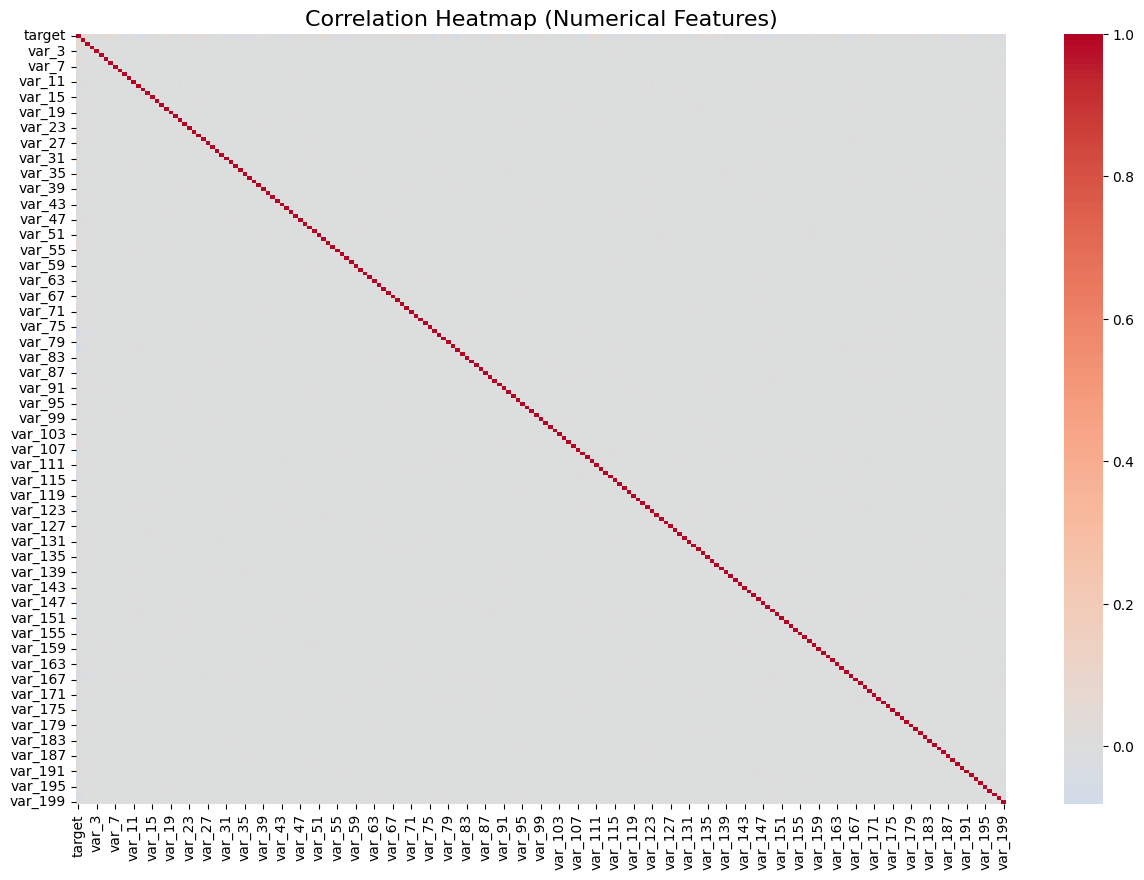

In [ ]:
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numerical Features)", fontsize=16)
plt.show()

In [ ]:
x = df.drop('target',axis=1)
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

## STANDARD SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_scale = sc.fit_transform(x_train)
x_test_scale = sc.transform(x_test)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## SMOTE()

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
x_sm,y_sm = sm.fit_resample(x_train_scale,y_train)

## Principal Component Analysis

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_scale)

PCA()

In [ ]:
import numpy as np
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print(cumulative_variance)

[0.00612011 0.01147025 0.01680953 0.02213505 0.02745532 0.03276622
 0.03807043 0.04336678 0.04865904 0.0539477  0.05922936 0.06450744
 0.06978043 0.07504824 0.0803121  0.0855722  0.09082609 0.09607844
 0.10132483 0.10656942 0.11180691 0.11704002 0.12227073 0.12750034
 0.13272326 0.1379425  0.14315372 0.14836337 0.15357113 0.15877555
 0.16397623 0.16917432 0.17436631 0.17955436 0.18474052 0.18992495
 0.19510798 0.2002866  0.20546074 0.21063202 0.21580252 0.22096662
 0.22612768 0.23128628 0.23644047 0.24159339 0.2467427  0.2518857
 0.25702631 0.26216313 0.26729732 0.2724257  0.27755148 0.28267681
 0.28779911 0.29292105 0.2980417  0.30315755 0.30827113 0.31338095
 0.31848785 0.3235909  0.32869193 0.33379093 0.33888454 0.34397495
 0.3490632  0.35414842 0.3592326  0.36431335 0.36939078 0.37446571
 0.3795351  0.38460334 0.3896664  0.39472794 0.39978791 0.40484444
 0.40989979 0.4149513  0.42000155 0.42504806 0.43009101 0.43512805
 0.44016258 0.44519411 0.45022311 0.45524931 0.46027239 0.46529

In [ ]:
# number of components to retain ~90-95% variance
n_components = np.argmax(cumulative_variance >= 0.90) + 1
print("Number of components to retain 90% variance:", n_components)

Number of components to retain 90% variance: 179


### PCA ON SCALE DATA

In [ ]:
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_scale)
x_test_pca = pca.transform(x_test_scale)

### PCA ON SMOTE DATA

In [ ]:
pca = PCA(n_components=n_components)
x_train_sm_pca = pca.fit_transform(x_sm)
x_test_sm_pca = pca.transform(x_test_scale)

## Logistic Regression

### STANDARD SCALING

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report,average_precision_score,accuracy_score,f1_score
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(x_train_scale, y_train)
y_scores = lr.predict_proba(x_test_scale)[:, 1]
print("Logistic Regression (Scaled)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, lr.predict(x_test_scale)))
acc = accuracy_score(y_test,lr.predict(x_test_scale))
f1 = f1_score(y_test,lr.predict(x_test_scale))
Logistic_Regression = pd.DataFrame(columns=["Model", "Accuracy","F1","AUC","PR AUC"])
Logistic_Regression.loc[len(Logistic_Regression)] = ['Logistic Regression STD_SCALE',acc,f1,auc,pr_auc]
Logistic_Regression

Logistic Regression (Scaled)
AUC: 0.8597216603294408
PR AUC: 0.5117486240143552
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35903
           1       0.70      0.27      0.39      4097

    accuracy                           0.91     40000
   macro avg       0.81      0.63      0.67     40000
weighted avg       0.90      0.91      0.90     40000



,Model,Accuracy,F1,AUC,PR AUC
0,Logistic Regression STD_SCALE,0.91305,0.387892,0.859722,0.511749


### SMOTE

In [ ]:
# Logistic Regression - SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report,average_precision_score
lr_sm = LogisticRegression(max_iter=1000, random_state=42)
lr_sm.fit(x_sm, y_sm)
y_scores = lr_sm.predict_proba(x_test_scale)[:, 1]
print("Logistic Regression (SMOTE)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, lr_sm.predict(x_test_scale)))
acc = accuracy_score(y_test,lr_sm.predict(x_test_scale))
f1 = f1_score(y_test,lr_sm.predict(x_test_scale))
Logistic_Regression.loc[len(Logistic_Regression)] = ['Logistic Regression SMOTE',acc,f1,auc,pr_auc]
Logistic_Regression

Logistic Regression (SMOTE)
AUC: 0.8583512428407378
PR AUC: 0.5092015166491033
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     35903
           1       0.29      0.76      0.42      4097

    accuracy                           0.79     40000
   macro avg       0.63      0.77      0.64     40000
weighted avg       0.90      0.79      0.82     40000



,Model,Accuracy,F1,AUC,PR AUC
0,Logistic Regression STD_SCALE,0.913050,0.387892,0.859722,0.511749
1,Logistic Regression SMOTE,0.785425,0.420655,0.858351,0.509202


### SCALED AND PCA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report,average_precision_score
lr_pca = LogisticRegression(max_iter=1000, random_state=42)
lr_pca.fit(x_train_pca, y_train)
y_scores = lr_pca.predict_proba(x_test_pca)[:, 1]
print("Logistic Regression (pca)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, lr_pca.predict(x_test_pca)))
acc = accuracy_score(y_test,lr_pca.predict(x_test_pca))
f1 = f1_score(y_test,lr_pca.predict(x_test_pca))
Logistic_Regression.loc[len(Logistic_Regression)] = ['Logistic Regression SCALED + PCA',acc,f1,auc,pr_auc]
Logistic_Regression

Logistic Regression (pca)
AUC: 0.8596046947776618
PR AUC: 0.5111941205696937
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35903
           1       0.69      0.27      0.39      4097

    accuracy                           0.91     40000
   macro avg       0.81      0.63      0.67     40000
weighted avg       0.90      0.91      0.90     40000



,Model,Accuracy,F1,AUC,PR AUC
0,Logistic Regression STD_SCALE,0.913050,0.387892,0.859722,0.511749
1,Logistic Regression SMOTE,0.785425,0.420655,0.858351,0.509202
2,Logistic Regression SCALED + PCA,0.912975,0.388547,0.859605,0.511194


### SCALED + SMOTE + PCA

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report,average_precision_score
lr_sc_sm_pca = LogisticRegression(max_iter=1000, random_state=42)
lr_sc_sm_pca.fit(x_train_sm_pca, y_sm)
y_scores = lr_sc_sm_pca.predict_proba(x_test_sm_pca)[:, 1]
print("Logistic Regression (pca)")
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, lr_sc_sm_pca.predict(x_test_sm_pca)))
acc = accuracy_score(y_test,lr_sc_sm_pca.predict(x_test_sm_pca))
f1 = f1_score(y_test,lr_sc_sm_pca.predict(x_test_sm_pca))
Logistic_Regression.loc[len(Logistic_Regression)] = ['Logistic Regression SCALED + SMOTE + PCA',acc,f1,auc,pr_auc]
Logistic_Regression

Logistic Regression (pca)
AUC: 0.8582685001653121
PR AUC: 0.5088867226959495
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     35903
           1       0.29      0.76      0.42      4097

    accuracy                           0.79     40000
   macro avg       0.63      0.77      0.64     40000
weighted avg       0.90      0.79      0.82     40000



,Model,Accuracy,F1,AUC,PR AUC
0,Logistic Regression STD_SCALE,0.913050,0.387892,0.859722,0.511749
1,Logistic Regression SMOTE,0.785425,0.420655,0.858351,0.509202
2,Logistic Regression SCALED + PCA,0.912975,0.388547,0.859605,0.511194
3,Logistic Regression SCALED + SMOTE + PCA,0.785350,0.420882,0.859605,0.508887


### CLASS WEIGHT BALANCE

In [ ]:
# Logistic Regression - Balanced
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report,average_precision_score
lr_bal = LogisticRegression(class_weight="balanced", max_iter=1000, random_state=42)
lr_bal.fit(x_train_scale, y_train)
y_scores = lr_bal.predict_proba(x_test_scale)[:, 1]
print("Logistic Regression (Balanced)")
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, lr_bal.predict(x_test_scale)))
acc = accuracy_score(y_test,lr_bal.predict(x_test_scale))
f1 = f1_score(y_test,lr_bal.predict(x_test_scale))
Logistic_Regression.loc[len(Logistic_Regression)] = ['Logistic Regression BALANCED',acc,f1,auc,pr_auc]
Logistic_Regression

Logistic Regression (Balanced)
AUC: 0.8593272950464915
PR AUC: 0.5104765321210178
              precision    recall  f1-score   support

           0       0.97      0.78      0.86     35903
           1       0.29      0.77      0.42      4097

    accuracy                           0.78     40000
   macro avg       0.63      0.78      0.64     40000
weighted avg       0.90      0.78      0.82     40000



,Model,Accuracy,F1,AUC,PR AUC
0,Logistic Regression STD_SCALE,0.913050,0.387892,0.859722,0.511749
1,Logistic Regression SMOTE,0.785425,0.420655,0.858351,0.509202
2,Logistic Regression SCALED + PCA,0.912975,0.388547,0.859605,0.511194
3,Logistic Regression SCALED + SMOTE + PCA,0.785350,0.420882,0.859605,0.508887
4,Logistic Regression BALANCED,0.778400,0.416842,0.859605,0.510477


## KNN

### SCALED

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, classification_report,average_precision_score
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train_scale, y_train)
y_scores = knn.predict_proba(x_test_scale)[:, 1]
print("KNN (Scaled)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, knn.predict(x_test_scale)))
acc = accuracy_score(y_test,knn.predict(x_test_scale))
f1 = f1_score(y_test,knn.predict(x_test_scale))
KNN = pd.DataFrame(columns=["Model", "Accuracy","F1","AUC","PR AUC"])
KNN.loc[len(KNN)] = ['KNN STD_SCALE',acc,f1,auc,pr_auc]
KNN

KNN (Scaled)
AUC: 0.5453802750639553
PR AUC: 0.11850325514196804
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.30      0.00      0.00      4097

    accuracy                           0.90     40000
   macro avg       0.60      0.50      0.47     40000
weighted avg       0.84      0.90      0.85     40000



,Model,Accuracy,F1,AUC,PR AUC
0,KNN STD_SCALE,0.897475,0.001461,0.54538,0.118503


### SMOTE

In [ ]:
# KNN - SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, classification_report,average_precision_score
knn_sm = KNeighborsClassifier(n_neighbors=5)
knn_sm.fit(x_sm, y_sm)
y_scores = knn_sm.predict_proba(x_test_scale)[:, 1]
print("KNN (SMOTE)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, knn_sm.predict(x_test_scale)))
acc = accuracy_score(y_test,knn_sm.predict(x_test_scale))
f1 = f1_score(y_test,knn_sm.predict(x_test_scale))
KNN.loc[len(KNN)] = ['KNN SMOTE',acc,f1,auc,pr_auc]
KNN

KNN (SMOTE)
AUC: 0.5026695271208171
PR AUC: 0.102918218635997


/Users/isnisnwsjmowm/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/isnisnwsjmowm/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/isnisnwsjmowm/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     35903
           1       0.10      1.00      0.19      4097

    accuracy                           0.10     40000
   macro avg       0.05      0.50      0.09     40000
weighted avg       0.01      0.10      0.02     40000



,Model,Accuracy,F1,AUC,PR AUC
0,KNN STD_SCALE,0.897475,0.001461,0.54538,0.118503
1,KNN SMOTE,0.102425,0.185818,0.50267,0.102918


### SCALING AND PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, classification_report,average_precision_score
knn_sc_pca = KNeighborsClassifier(n_neighbors=5)
knn_sc_pca.fit(x_train_pca, y_train)
y_scores = knn_sc_pca.predict_proba(x_test_pca)[:, 1]
print("KNN (Scaled)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, knn_sc_pca.predict(x_test_pca)))
acc = accuracy_score(y_test,knn_sc_pca.predict(x_test_pca))
f1 = f1_score(y_test,knn_sc_pca.predict(x_test_pca))
KNN.loc[len(KNN)] = ['KNN SCALE + PCA',acc,f1,auc,pr_auc]
KNN


KNN (Scaled)
AUC: 0.5461257171584236
PR AUC: 0.11918109284371405
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.64      0.00      0.00      4097

    accuracy                           0.90     40000
   macro avg       0.77      0.50      0.48     40000
weighted avg       0.87      0.90      0.85     40000



,Model,Accuracy,F1,AUC,PR AUC
0,KNN STD_SCALE,0.897475,0.001461,0.545380,0.118503
1,KNN SMOTE,0.102425,0.185818,0.502670,0.102918
2,KNN SCALE + PCA,0.897675,0.004378,0.546126,0.119181


### SCALING + SMOTE + PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, classification_report,average_precision_score
knn_sm_pca = KNeighborsClassifier(n_neighbors=5)
knn_sm_pca.fit(x_train_sm_pca, y_sm)
y_scores = knn_sm_pca.predict_proba(x_test_sm_pca)[:, 1]
print("KNN (Scaled)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, knn_sm_pca.predict(x_test_sm_pca)))
acc = accuracy_score(y_test,knn_sm_pca.predict(x_test_sm_pca))
f1 = f1_score(y_test,knn_sm_pca.predict(x_test_sm_pca))
KNN.loc[len(KNN)] = ['KNN SCALED + SMOTE + PCA',acc,f1,auc,pr_auc]
KNN

KNN (Scaled)
AUC: 0.5081129971665647
PR AUC: 0.10394078389826085
              precision    recall  f1-score   support

           0       1.00      0.00      0.00     35903
           1       0.10      1.00      0.19      4097

    accuracy                           0.10     40000
   macro avg       0.55      0.50      0.09     40000
weighted avg       0.91      0.10      0.02     40000



,Model,Accuracy,F1,AUC,PR AUC
0,KNN STD_SCALE,0.897475,0.001461,0.545380,0.118503
1,KNN SMOTE,0.102425,0.185818,0.502670,0.102918
2,KNN SCALE + PCA,0.897675,0.004378,0.546126,0.119181
3,KNN SCALED + SMOTE + PCA,0.102450,0.185822,0.508113,0.103941


## SVM

### SCALED

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_auc_score, classification_report,average_precision_score

# LinearSVC - Scaled Data
svc_scaled = LinearSVC(max_iter=5000, random_state=42)
svc_scaled.fit(x_train_scale, y_train)
y_scores = svc_scaled.decision_function(x_test_scale)
print("-"*50)
print("LinearSVC (Scaled)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, svc_scaled.predict(x_test_scale)))
acc = accuracy_score(y_test,svc_scaled.predict(x_test_scale))
f1 = f1_score(y_test,svc_scaled.predict(x_test_scale))
print("-"*50)
SVM = pd.DataFrame(columns=["Model", "Accuracy","F1","AUC","PR AUC"])
SVM.loc[len(SVM)] = ['SVM STD_SCALE',acc,f1,auc,pr_auc]
SVM

--------------------------------------------------
LinearSVC (Scaled)
AUC: 0.8597290093420226
PR AUC: 0.5117705046046171
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     35903
           1       0.79      0.17      0.28      4097

    accuracy                           0.91     40000
   macro avg       0.85      0.58      0.62     40000
weighted avg       0.90      0.91      0.88     40000

--------------------------------------------------


,Model,Accuracy,F1,AUC,PR AUC
0,SVM STD_SCALE,0.910425,0.280955,0.859729,0.511771


### SMOTE

In [ ]:
# LinearSVC - SMOTE
svc_sm = LinearSVC(max_iter=5000, random_state=42)
svc_sm.fit(x_sm, y_sm)
y_scores = svc_sm.decision_function(x_test_scale)
print("LinearSVC (SMOTE)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, svc_sm.predict(x_test_scale)))
acc = accuracy_score(y_test,svc_sm.predict(x_test_scale))
f1 = f1_score(y_test,svc_sm.predict(x_test_scale))
print("-"*50)
SVM.loc[len(SVM)] = ['SVM SMOTE',acc,f1,auc,pr_auc]
SVM

LinearSVC (SMOTE)
AUC: 0.8583909995711535
PR AUC: 0.5092624916543642
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     35903
           1       0.29      0.76      0.42      4097

    accuracy                           0.78     40000
   macro avg       0.63      0.77      0.64     40000
weighted avg       0.90      0.78      0.82     40000

--------------------------------------------------


,Model,Accuracy,F1,AUC,PR AUC
0,SVM STD_SCALE,0.910425,0.280955,0.859729,0.511771
1,SVM SMOTE,0.783650,0.419428,0.858391,0.509262


### SCALING PCA

In [ ]:
svc_pca = LinearSVC(max_iter=5000, random_state=42)
svc_pca.fit(x_train_pca, y_train)
y_scores = svc_pca.decision_function(x_test_pca)
print("LinearSVC (SMOTE)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, svc_pca.predict(x_test_pca)))
acc = accuracy_score(y_test,svc_pca.predict(x_test_pca))
f1 = f1_score(y_test,svc_pca.predict(x_test_pca))
print("-"*50)
SVM.loc[len(SVM)] = ['SVM SCALE + PCA',acc,f1,auc,pr_auc]
SVM

LinearSVC (SMOTE)
AUC: 0.8596246003362559
PR AUC: 0.5111268448249648
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     35903
           1       0.79      0.17      0.28      4097

    accuracy                           0.91     40000
   macro avg       0.85      0.58      0.62     40000
weighted avg       0.90      0.91      0.88     40000

--------------------------------------------------


,Model,Accuracy,F1,AUC,PR AUC
0,SVM STD_SCALE,0.910425,0.280955,0.859729,0.511771
1,SVM SMOTE,0.783650,0.419428,0.858391,0.509262
2,SVM SCALE + PCA,0.910300,0.280385,0.859625,0.511127


### SCALING + SMOTE + PCA

In [ ]:
svc_sm_pca = LinearSVC(max_iter=5000, random_state=42)
svc_sm_pca.fit(x_train_sm_pca, y_sm)
y_scores = svc_sm_pca.decision_function(x_test_sm_pca)
print("LinearSVC (SMOTE)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, svc_sm_pca.predict(x_test_sm_pca)))
acc = accuracy_score(y_test,svc_sm_pca.predict(x_test_sm_pca))
f1 = f1_score(y_test,svc_sm_pca.predict(x_test_sm_pca))
print("-"*50)
SVM.loc[len(SVM)] = ['SVM SCALE + SMOTE + PCA',acc,f1,auc,pr_auc]
SVM

LinearSVC (SMOTE)
AUC: 0.858260464519732
PR AUC: 0.5089091358050589
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     35903
           1       0.29      0.76      0.42      4097

    accuracy                           0.78     40000
   macro avg       0.63      0.78      0.64     40000
weighted avg       0.90      0.78      0.82     40000

--------------------------------------------------


,Model,Accuracy,F1,AUC,PR AUC
0,SVM STD_SCALE,0.910425,0.280955,0.859729,0.511771
1,SVM SMOTE,0.783650,0.419428,0.858391,0.509262
2,SVM SCALE + PCA,0.910300,0.280385,0.859625,0.511127
3,SVM SCALE + SMOTE + PCA,0.783875,0.420071,0.858260,0.508909


### BALANCE SVM

In [ ]:
# LinearSVC - Balanced
svc_bal = LinearSVC(class_weight="balanced", max_iter=5000, random_state=42)
svc_bal.fit(x_train_scale, y_train)
y_scores = svc_bal.decision_function(x_test_scale)
print("LinearSVC (Balanced)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, svc_bal.predict(x_test_scale)))
acc = accuracy_score(y_test,svc_bal.predict(x_test_scale))
f1 = f1_score(y_test,svc_bal.predict(x_test_scale))
print("-"*50)
SVM.loc[len(SVM)] = ['SVM BALANCE',acc,f1,auc,pr_auc]
SVM

LinearSVC (Balanced)
AUC: 0.8593641556812921
PR AUC: 0.5105784965195214
              precision    recall  f1-score   support

           0       0.97      0.78      0.86     35903
           1       0.29      0.77      0.42      4097

    accuracy                           0.78     40000
   macro avg       0.63      0.78      0.64     40000
weighted avg       0.90      0.78      0.82     40000

--------------------------------------------------


,Model,Accuracy,F1,AUC,PR AUC
0,SVM STD_SCALE,0.910425,0.280955,0.859729,0.511771
1,SVM SMOTE,0.783650,0.419428,0.858391,0.509262
2,SVM SCALE + PCA,0.910300,0.280385,0.859625,0.511127
3,SVM SCALE + SMOTE + PCA,0.783875,0.420071,0.858260,0.508909
4,SVM BALANCE,0.778800,0.417128,0.859364,0.510578


## Gradient Boost

### SCALED

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report,average_precision_score,accuracy_score,f1_score

# GB - Scaled Data
gb = GradientBoostingClassifier(random_state=42)
gb.fit(x_train_scale, y_train)
y_scores = gb.predict_proba(x_test_scale)[:, 1]
print("Gradient Boosting (Scaled)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, gb.predict(x_test_scale)))
acc = accuracy_score(y_test,gb.predict(x_test_scale))
f1 = f1_score(y_test,gb.predict(x_test_scale))
print("-"*50)
gb = pd.DataFrame(columns=["Model", "Accuracy","F1","AUC","PR AUC"])
gb.loc[len(gb)] = ['GB STD_SCALE',acc,f1,auc,pr_auc]
gb

Gradient Boosting (Scaled)
AUC: 0.8329306344106153
PR AUC: 0.4506915021983262
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.85      0.03      0.06      4097

    accuracy                           0.90     40000
   macro avg       0.88      0.52      0.50     40000
weighted avg       0.90      0.90      0.86     40000

--------------------------------------------------


,Model,Accuracy,F1,AUC,PR AUC
0,GB STD_SCALE,0.9003,0.062088,0.832931,0.450692


### SMOTE

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report,average_precision_score,accuracy_score,f1_score

gb_sm = GradientBoostingClassifier(random_state=42)
gb_sm.fit(x_sm, y_sm)
y_scores = gb_sm.predict_proba(x_test_scale)[:, 1]
print("Gradient Boosting (SMOTE)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, gb_sm.predict(x_test_scale)))
acc = accuracy_score(y_test,gb_sm.predict(x_test_scale))
f1 = f1_score(y_test,gb_sm.predict(x_test_scale))
print("-"*50)
gb.loc[len(gb)] = ['GB SMOTE',acc,f1,auc,pr_auc]
gb

Gradient Boosting (SMOTE)
AUC: 0.6903394564658056
PR AUC: 0.20573700374957998
              precision    recall  f1-score   support

           0       0.92      0.85      0.88     35903
           1       0.22      0.37      0.27      4097

    accuracy                           0.80     40000
   macro avg       0.57      0.61      0.58     40000
weighted avg       0.85      0.80      0.82     40000

--------------------------------------------------


,Model,Accuracy,F1,AUC,PR AUC
0,GB STD_SCALE,0.900300,0.062088,0.832931,0.450692
1,GB SMOTE,0.799125,0.274230,0.690339,0.205737


### SCALING + PCA

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report,average_precision_score,accuracy_score,f1_score

gb_pca = GradientBoostingClassifier(random_state=42)
gb_pca.fit(x_train_pca, y_train)
y_scores = gb_pca.predict_proba(x_test_pca)[:, 1]
print("Gradient Boosting (SCALE + PCA)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, gb_pca.predict(x_test_pca)))
acc = accuracy_score(y_test,gb_pca.predict(x_test_pca))
f1 = f1_score(y_test,gb_pca.predict(x_test_pca))
print("-"*50)
gb.loc[len(gb)] = ['GB SCALE + PCA',acc,f1,auc,pr_auc]
gb

Gradient Boosting (SCALE + PCA)
AUC: 0.8586983392203729
PR AUC: 0.5057640186786773
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35903
           1       0.70      0.26      0.38      4097

    accuracy                           0.91     40000
   macro avg       0.81      0.62      0.67     40000
weighted avg       0.90      0.91      0.89     40000

--------------------------------------------------


,Model,Accuracy,F1,AUC,PR AUC
0,GB STD_SCALE,0.900300,0.062088,0.832931,0.450692
1,GB SMOTE,0.799125,0.274230,0.690339,0.205737
2,GB SCALE + PCA,0.913025,0.380410,0.858698,0.505764


### SCALE + SMOTE + PCA

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, classification_report,average_precision_score,accuracy_score,f1_score

gb_sm_pca = GradientBoostingClassifier(random_state=42)
gb_sm_pca.fit(x_train_sm_pca, y_sm)
y_scores = gb_sm_pca.predict_proba(x_test_sm_pca)[:, 1]
print("Gradient Boosting (SCALE + SMOTE + PCA)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, gb_sm_pca.predict(x_test_sm_pca)))
acc = accuracy_score(y_test,gb_sm_pca.predict(x_test_sm_pca))
f1 = f1_score(y_test,gb_sm_pca.predict(x_test_sm_pca))
print("-"*50)
gb.loc[len(gb)] = ['GB SCALE + SMOTE + PCA',acc,f1,auc,pr_auc]
gb

Gradient Boosting (SCALE + SMOTE + PCA)
AUC: 0.8409358505915421
PR AUC: 0.43704316202480464
              precision    recall  f1-score   support

           0       0.96      0.83      0.89     35903
           1       0.32      0.68      0.43      4097

    accuracy                           0.82     40000
   macro avg       0.64      0.76      0.66     40000
weighted avg       0.89      0.82      0.84     40000

--------------------------------------------------


,Model,Accuracy,F1,AUC,PR AUC
0,GB STD_SCALE,0.900300,0.062088,0.832931,0.450692
1,GB SMOTE,0.799125,0.274230,0.690339,0.205737
2,GB SCALE + PCA,0.913025,0.380410,0.858698,0.505764
3,GB SCALE + SMOTE + PCA,0.817225,0.433212,0.840936,0.437043


## RANDOM FOREST

### SCALED

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report,average_precision_score,accuracy_score,f1_score

# RF - Scaled Data
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(x_train_scale, y_train)
y_scores = rf.predict_proba(x_test_scale)[:, 1]
print("Random Forest (Scaled)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, rf.predict(x_test_scale)))
acc = accuracy_score(y_test,rf.predict(x_test_scale))
f1 = f1_score(y_test,rf.predict(x_test_scale))
print("-"*50)
RandomForest = pd.DataFrame(columns=["Model", "Accuracy","F1","AUC","PR AUC"])
RandomForest.loc[len(RandomForest)] = ['RandomForest STD_SCALE',acc,f1,auc,pr_auc]
RandomForest

Random Forest (Scaled)
AUC: 0.8323320773909355
PR AUC: 0.4526020984445506


/Users/isnisnwsjmowm/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/isnisnwsjmowm/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/isnisnwsjmowm/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.00      0.00      0.00      4097

    accuracy                           0.90     40000
   macro avg       0.45      0.50      0.47     40000
weighted avg       0.81      0.90      0.85     40000

--------------------------------------------------


,Model,Accuracy,F1,AUC,PR AUC
0,RandomForest STD_SCALE,0.897575,0.0,0.832332,0.452602


### SMOTE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report,average_precision_score,accuracy_score,f1_score

rf_sm = RandomForestClassifier(n_estimators=200, random_state=42)
rf_sm.fit(x_sm, y_sm)
y_scores = rf_sm.predict_proba(x_test_scale)[:, 1]
print("Random Forest (SMOTE)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print(classification_report(y_test, rf_sm.predict(x_test_scale)))
acc = accuracy_score(y_test,rf_sm.predict(x_test_scale))
f1 = f1_score(y_test,rf_sm.predict(x_test_scale))
print("-"*50)
RandomForest.loc[len(RandomForest)] = ['RandomForest SMOTE',acc,f1,auc,pr_auc]
RandomForest

Random Forest (SMOTE)
AUC: 0.7286853022352128
              precision    recall  f1-score   support

           0       0.90      1.00      0.94     35903
           1       0.31      0.02      0.04      4097

    accuracy                           0.90     40000
   macro avg       0.60      0.51      0.49     40000
weighted avg       0.84      0.90      0.85     40000

--------------------------------------------------


,Model,Accuracy,F1,AUC,PR AUC
0,RandomForest STD_SCALE,0.897575,0.000000,0.832332,0.452602
1,RandomForest SMOTE,0.895100,0.036731,0.728685,0.215584


### SCALING + PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report,average_precision_score,accuracy_score,f1_score

rf_sc_pca = RandomForestClassifier(n_estimators=200, random_state=42)
rf_sc_pca.fit(x_train_pca, y_train)
y_scores = rf_sc_pca.predict_proba(x_test_pca)[:, 1]
print("Random Forest (SCALE + PCA)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC", average_precision_score(y_test, y_scores))
print(classification_report(y_test, rf_sc_pca.predict(x_test_pca)))
acc = accuracy_score(y_test,rf_sc_pca.predict(x_test_pca))
f1 = f1_score(y_test,rf_sc_pca.predict(x_test_pca))
print("-"*50)
RandomForest.loc[len(RandomForest)] = ['RandomForest SCALING + PCA',acc,f1,auc,pr_auc]
RandomForest

Random Forest (SCALE + PCA)
AUC: 0.856411915921504
PR AUC 0.49645262637186066
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35903
           1       0.73      0.22      0.34      4097

    accuracy                           0.91     40000
   macro avg       0.82      0.61      0.65     40000
weighted avg       0.90      0.91      0.89     40000

--------------------------------------------------


,Model,Accuracy,F1,AUC,PR AUC
0,RandomForest STD_SCALE,0.897575,0.000000,0.832332,0.452602
1,RandomForest SMOTE,0.895100,0.036731,0.728685,0.215584
2,RandomForest SCALING + PCA,0.911925,0.342846,0.856412,0.496453


### SCALE + SMOTE + PCA

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report,average_precision_score,accuracy_score,f1_score

rf_sm_pca = RandomForestClassifier(n_estimators=200, random_state=42)
rf_sm_pca.fit(x_train_sm_pca, y_sm)
y_scores = rf_sm_pca.predict_proba(x_test_sm_pca)[:, 1]
print("Random Forest (SCALE + SMOTE + PCA)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC", average_precision_score(y_test, y_scores))
print(classification_report(y_test, rf_sm_pca.predict(x_test_sm_pca)))
acc = accuracy_score(y_test,rf_sm_pca.predict(x_test_sm_pca))
f1 = f1_score(y_test,rf_sm_pca.predict(x_test_sm_pca))
print("-"*50)
RandomForest.loc[len(RandomForest)] = ['RandomForest SCALE + SMOTE + PCA',acc,f1,auc,pr_auc]
RandomForest

Random Forest (SCALE + SMOTE + PCA)
AUC: 0.8301083722378344
PR AUC 0.3304518039485513
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     35903
           1       0.41      0.38      0.39      4097

    accuracy                           0.88     40000
   macro avg       0.67      0.66      0.66     40000
weighted avg       0.88      0.88      0.88     40000

--------------------------------------------------


,Model,Accuracy,F1,AUC,PR AUC
0,RandomForest STD_SCALE,0.897575,0.000000,0.832332,0.452602
1,RandomForest SMOTE,0.895100,0.036731,0.728685,0.215584
2,RandomForest SCALING + PCA,0.911925,0.342846,0.856412,0.496453
3,RandomForest SCALE + SMOTE + PCA,0.880050,0.394345,0.830108,0.330452


### BALANCE

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report,average_precision_score,accuracy_score,f1_score

rf_bal = RandomForestClassifier(class_weight="balanced", n_estimators=200, random_state=42)
rf_bal.fit(x_train_scale, y_train)
y_scores = rf_bal.predict_proba(x_test_scale)[:, 1]
print("Random Forest (Balanced)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC", average_precision_score(y_test, y_scores))
print(classification_report(y_test, rf_bal.predict(x_test_scale)))
acc = accuracy_score(y_test,rf_bal.predict(x_test_scale))
f1 = f1_score(y_test,rf_bal.predict(x_test_scale))
print("-"*50)
RandomForest.loc[len(RandomForest)] = ['RandomForest BALANCE',acc,f1,auc,pr_auc]
RandomForest

Random Forest (Balanced)
AUC: 0.8096752585552245
PR AUC 0.3478705897865997


/Users/isnisnwsjmowm/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/isnisnwsjmowm/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/isnisnwsjmowm/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     35903
           1       0.00      0.00      0.00      4097

    accuracy                           0.90     40000
   macro avg       0.45      0.50      0.47     40000
weighted avg       0.81      0.90      0.85     40000

--------------------------------------------------


,Model,Accuracy,F1,AUC,PR AUC
0,RandomForest STD_SCALE,0.897575,0.000000,0.832332,0.452602
1,RandomForest SMOTE,0.895100,0.036731,0.728685,0.215584
2,RandomForest SCALING + PCA,0.911925,0.342846,0.856412,0.496453
3,RandomForest SCALE + SMOTE + PCA,0.880050,0.394345,0.830108,0.330452
4,RandomForest BALANCE,0.897575,0.000000,0.809675,0.347871


## XG BOOST

### SCALED

In [ ]:
from xgboost import XGBClassifier

# XGBoost - Scaled Data
xgb = XGBClassifier(eval_metric="logloss", random_state=42)
xgb.fit(x_train_scale, y_train)
y_scores = xgb.predict_proba(x_test_scale)[:, 1]
print("XGBoost (Scaled)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, xgb.predict(x_test_scale)))
acc = accuracy_score(y_test,xgb.predict(x_test_scale))
f1 = f1_score(y_test,xgb.predict(x_test_scale))
print("-"*50)
XGB = pd.DataFrame(columns=["Model", "Accuracy","F1","AUC","PR AUC"])
XGB.loc[len(XGB)] = ['XGB STD_SCALE',acc,f1,auc,pr_auc]
XGB

XGBoost (Scaled)
AUC: 0.8559531634987175
PR AUC: 0.49748287057460033
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     35903
           1       0.69      0.24      0.36      4097

    accuracy                           0.91     40000
   macro avg       0.81      0.62      0.66     40000
weighted avg       0.90      0.91      0.89     40000

--------------------------------------------------


,Model,Accuracy,F1,AUC,PR AUC
0,XGB STD_SCALE,0.911325,0.359863,0.855953,0.497483


### SMOTE FOR XGBOOST

In [ ]:
# XGBoost - SMOTE
xgb_sm = XGBClassifier(eval_metric="logloss", random_state=42)
xgb_sm.fit(x_sm, y_sm)
y_scores = xgb_sm.predict_proba(x_test_scale)[:, 1]
print("XGBoost (SMOTE)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, xgb_sm.predict(x_test_scale)))
acc = accuracy_score(y_test,xgb_sm.predict(x_test_scale))
f1 = f1_score(y_test,xgb_sm.predict(x_test_scale))
print("-"*50)
XGB.loc[len(XGB)] = ['XGB SMOTE',acc,f1,auc,pr_auc]
XGB

XGBoost (SMOTE)
AUC: 0.7332511839269468
PR AUC: 0.26052157106884943
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     35903
           1       0.29      0.33      0.31      4097

    accuracy                           0.85     40000
   macro avg       0.61      0.62      0.61     40000
weighted avg       0.86      0.85      0.85     40000

--------------------------------------------------


,Model,Accuracy,F1,AUC,PR AUC
0,XGB STD_SCALE,0.911325,0.359863,0.855953,0.497483
1,XGB SMOTE,0.848675,0.310357,0.733251,0.260522


### SCALE + PCA

In [ ]:
xgb_sc_pca = XGBClassifier(eval_metric="logloss", random_state=42)
xgb_sc_pca.fit(x_train_pca, y_train)
y_scores = xgb_sc_pca.predict_proba(x_test_pca)[:, 1]
print("XGBoost (SMOTE)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, xgb_sc_pca.predict(x_test_pca)))
acc = accuracy_score(y_test,xgb_sc_pca.predict(x_test_pca))
f1 = f1_score(y_test,xgb_sc_pca.predict(x_test_pca))
print("-"*50)
XGB.loc[len(XGB)] = ['XGB SCALE + PCA',acc,f1,auc,pr_auc]
XGB

XGBoost (SMOTE)
AUC: 0.8526609826190006
PR AUC: 0.48616318678737175
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     35903
           1       0.65      0.28      0.40      4097

    accuracy                           0.91     40000
   macro avg       0.79      0.63      0.67     40000
weighted avg       0.90      0.91      0.89     40000

--------------------------------------------------


,Model,Accuracy,F1,AUC,PR AUC
0,XGB STD_SCALE,0.911325,0.359863,0.855953,0.497483
1,XGB SMOTE,0.848675,0.310357,0.733251,0.260522
2,XGB SCALE + PCA,0.910950,0.395451,0.852661,0.486163


### SCALE + SMOTE + PCA

In [ ]:
xgb_sm_pca = XGBClassifier(eval_metric="logloss", random_state=42)
xgb_sm_pca.fit(x_train_sm_pca, y_sm)
y_scores = xgb_sm_pca.predict_proba(x_test_sm_pca)[:, 1]
print("XGBoost (SMOTE)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, xgb_sm_pca.predict(x_test_sm_pca)))
acc = accuracy_score(y_test,xgb_sm_pca.predict(x_test_sm_pca))
f1 = f1_score(y_test,xgb_sm_pca.predict(x_test_sm_pca))
print("-"*50)
XGB.loc[len(XGB)] = ['XGB SCALE + SMOTE + PCA',acc,f1,auc,pr_auc]
XGB

XGBoost (SMOTE)
AUC: 0.7802709108453892
PR AUC: 0.341661948921512
              precision    recall  f1-score   support

           0       0.93      0.90      0.92     35903
           1       0.34      0.45      0.39      4097

    accuracy                           0.85     40000
   macro avg       0.64      0.67      0.65     40000
weighted avg       0.87      0.85      0.86     40000

--------------------------------------------------


,Model,Accuracy,F1,AUC,PR AUC
0,XGB STD_SCALE,0.911325,0.359863,0.855953,0.497483
1,XGB SMOTE,0.848675,0.310357,0.733251,0.260522
2,XGB SCALE + PCA,0.910950,0.395451,0.852661,0.486163
3,XGB SCALE + SMOTE + PCA,0.853025,0.385106,0.780271,0.341662


### BALANCE XG BOOST

In [ ]:
# XGBoost - Balanced (scale_pos_weight)
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]
xgb_bal = XGBClassifier(scale_pos_weight=scale_pos_weight,
                        eval_metric="logloss", random_state=42)
xgb_bal.fit(x_train_scale, y_train)
y_scores = xgb_bal.predict_proba(x_test_scale)[:, 1]
print("XGBoost (Balanced)")
auc = roc_auc_score(y_test, y_scores)
print("AUC:", roc_auc_score(y_test, y_scores))
pr_auc = average_precision_score(y_test, y_scores)
print("PR AUC:", average_precision_score(y_test, y_scores))
print(classification_report(y_test, xgb_bal.predict(x_test_scale)))
acc = accuracy_score(y_test,xgb_bal.predict(x_test_scale))
f1 = f1_score(y_test,xgb_bal.predict(x_test_scale))
print("-"*50)
XGB.loc[len(XGB)] = ['XGB BALANCE',acc,f1,auc,pr_auc]
XGB

XGBoost (Balanced)
AUC: 0.85233034843545
PR AUC: 0.49940497783359916
              precision    recall  f1-score   support

           0       0.95      0.89      0.92     35903
           1       0.39      0.60      0.48      4097

    accuracy                           0.86     40000
   macro avg       0.67      0.75      0.70     40000
weighted avg       0.89      0.86      0.88     40000

--------------------------------------------------


,Model,Accuracy,F1,AUC,PR AUC
0,XGB STD_SCALE,0.911325,0.359863,0.855953,0.497483
1,XGB SMOTE,0.848675,0.310357,0.733251,0.260522
2,XGB SCALE + PCA,0.910950,0.395451,0.852661,0.486163
3,XGB SCALE + SMOTE + PCA,0.853025,0.385106,0.780271,0.341662
4,XGB BALANCE,0.864750,0.476485,0.852330,0.499405


## MODEL SUMMARY

1. Logistic Regression
Logistic Regression with standard scaling performed consistently well, achieving the highest PR AUC (0.5117) among all models and a competitive AUC (0.859). Although its F1 score (0.39) was lower than XGBoost, it provided a strong baseline with high stability and interpretability. Variants with SMOTE or balancing did not improve performance significantly.

2. K-Nearest Neighbors (KNN)
KNN performed poorly on this dataset. Despite achieving moderate accuracy (0.89) in scaled versions, its F1 score was almost zero and PR AUC remained very low (0.11). This shows KNN was unable to capture the minority class effectively, making it unsuitable for this imbalanced problem.
3. Support Vector Machine (SVM)
SVM with standard scaling performed similarly to Logistic Regression, with a PR AUC of 0.5117 and AUC of ~0.859. However, its F1 score (0.28–0.42 depending on balancing) was slightly weaker compared to Logistic Regression. While SVM was stable, it did not outperform simpler models, making it less attractive as the final choice.
4. Gradient Boosting (GB)
Gradient Boosting achieved its best performance with SMOTE + PCA, reaching an F1 score of 0.433, higher than Logistic Regression and SVM. However, its PR AUC (0.437) was lower than both. This indicates GB could better capture positive cases but at the cost of precision-recall balance.
5. Random Forest
Random Forest models showed mixed performance. With PCA + SMOTE, the F1 score improved to 0.394, but the PR AUC values (0.33–0.45) remained lower than Logistic Regression and XGBoost. Overall, Random Forest struggled with the dataset’s imbalance compared to other tree-based methods.
6. XGBoost (XGB)
XGBoost with class balancing emerged as the best overall performer. It achieved the highest F1 score (0.476), indicating strong ability to detect minority transactions, and a competitive PR AUC (0.499), very close to Logistic Regression’s best. The AUC (~0.852) was also stable. XGBoost balanced model complexity and class imbalance effectively, making it the final model of choice.

## CONCLUSION

- After evaluating multiple machine learning models on the transaction prediction dataset, I selected XGBoost with class balancing as the final model. While Logistic Regression with standard scaling achieved the highest PR AUC (0.5117), XGBoost Balanced provided the best overall performance, with the highest F1 score (0.476) and a competitive PR AUC (0.499).Since the dataset is highly imbalanced, the F1 score and PR AUC were prioritized over accuracy. Logistic Regression offered stability and interpretability, but XGBoost demonstrated a stronger ability to capture the minority class transactions, which is critical for this prediction task. Therefore, XGBoost Balanced was chosen as the final model for its balance between precision and recall, making it more reliable in detecting rare but important events.

## CHALLANGES FACED

1. Imbalanced Dataset – The dataset had far fewer positive (fraud/target) cases compared to negative ones, which made accuracy misleading and required focusing on PR AUC and F1 score.

2. Model Performance Trade-offs – Some models (e.g., Logistic Regression) achieved higher PR AUC, while others (e.g., XGBoost) achieved higher F1, making model selection less straightforward.

3. Feature Dimensionality – The dataset contained a very large number of columns, making feature engineering and dimensionality reduction (e.g., PCA) necessary to control model complexity.

4. Effectiveness of Resampling Techniques – Methods like SMOTE sometimes reduced accuracy or stability, requiring multiple experiments with balanced class weights and PCA.

5. Computational Cost – Training tree-based models and tuning hyperparameters (Random Forest, XGBoost, Gradient Boosting) was computationally expensive, especially with large feature sets.